In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Twitter Analysis

In [ ]:
df = pd.read_excel("/content/twitter lexicon data post elections.xlsx")
df.head()

,type,id,url,twitterUrl,text,fullText,source,retweetCount,replyCount_x,likeCount,...,viewsCount,post_url,post_text,Author Handle,accounts_type,sentiment,sentiment reply,sentiment_score,emotion reply,emotion_score
0,tweet,2002058232177811968,https://x.com/gold_higs/status/200205823217781...,https://twitter.com/gold_higs/status/200205823...,@KagutaMuseveni Ensonga Yoweri 👍 #WhyUgStillNe...,@KagutaMuseveni Ensonga Yoweri 👍 #WhyUgStillNe...,Twitter for iPhone,0,0,0,...,NaN,NaN,NaN,NaN,lexicon,Neutral,LABEL_1,0.824551,neutral,0.900110
1,tweet,2002057831386918912,https://x.com/gold_higs/status/200205783138691...,https://twitter.com/gold_higs/status/200205783...,@KagutaMuseveni Thank you Mzee for spreading t...,@KagutaMuseveni Thank you Mzee for spreading t...,Twitter for iPhone,0,0,1,...,NaN,NaN,NaN,NaN,lexicon,Positive,LABEL_2,0.903433,gratitude,0.935716
2,tweet,2002034287563173888,https://x.com/Michael_Ma3255/status/2002034287...,https://twitter.com/Michael_Ma3255/status/2002...,#WhyUgStillNeedsM7 #SoarToNamboole #PearlOfAfr...,#WhyUgStillNeedsM7 #SoarToNamboole #PearlOfAfr...,Twitter for Android,0,0,0,...,NaN,NaN,NaN,NaN,lexicon,Neutral,LABEL_1,0.821164,neutral,0.916497
3,tweet,2002029852593950976,https://x.com/CaptainEbe89058/status/200202985...,https://twitter.com/CaptainEbe89058/status/200...,VP @JessicaAlupo pledged to direct @MoWT_Ug to...,VP @JessicaAlupo pledged to direct @MoWT_Ug to...,Twitter Web App,0,0,0,...,NaN,NaN,NaN,NaN,lexicon,Negative,LABEL_1,0.807280,neutral,0.949911
4,tweet,2002028222645498112,https://x.com/bd4es8lnay65424/status/200202822...,https://twitter.com/bd4es8lnay65424/status/200...,"Uganda to Cut EV Import Incentives, Boost Loca...","Uganda to Cut EV Import Incentives, Boost Loca...",Twitter for Android,0,0,0,...,NaN,NaN,NaN,NaN,lexicon,Positive,LABEL_1,0.821374,neutral,0.935627


In [ ]:
df.shape

(52843, 58)

In [ ]:
df.columns

Index(['type', 'id', 'url', 'twitterUrl', 'text', 'fullText', 'source',
       'retweetCount', 'replyCount_x', 'likeCount', 'quoteCount_x',
       'viewCount', 'createdAt', 'lang', 'bookmarkCount', 'isReply',
       'conversationId_x', 'isPinned', 'author_x', 'extendedEntities', 'card',
       'place', 'entities', 'isRetweet', 'retweet', 'isQuote', 'media_x',
       'isConversationControlled', 'possiblySensitive', 'inReplyToId',
       'inReplyToUserId', 'inReplyToUsername', 'quoteId', 'quote', 'postUrl',
       'postId', 'replyId', 'inReplyTo', 'replyUrl', 'replyText', 'timestamp',
       'conversationId_y', 'media_y', 'author_y', 'replyCount_y',
       'quoteCount_y', 'repostCount', 'favouriteCount', 'viewsCount',
       'post_url', 'post_text', 'Author Handle', 'accounts_type', 'sentiment',
       'sentiment reply', 'sentiment_score', 'emotion reply', 'emotion_score'],
      dtype='object')

In [ ]:
df['date'] = pd.to_datetime(df['createdAt'], errors='coerce')
df = df[df['date'] >= '2025-12-01']
df['date']

/tmp/ipython-input-3258534096.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['createdAt'], errors='coerce')


,date
0,2025-12-19 16:47:33+00:00
1,2025-12-19 16:45:58+00:00
2,2025-12-19 15:12:24+00:00
3,2025-12-19 14:54:47+00:00
4,2025-12-19 14:48:18+00:00
...,...
52838,2025-12-02 11:38:17+00:00
52839,2025-12-02 11:20:34+00:00
52840,2025-12-02 10:22:56+00:00
52841,2025-12-02 10:10:03+00:00


## Posts Distribution over time

In [ ]:
posts_df = df.drop_duplicates(subset=['twitterUrl'], keep='first')

comments_df = df[['postUrl', 'postId',
       'replyId', 'inReplyTo', 'replyUrl', 'replyText', 'timestamp',
       'conversationId_y', 'media_y', 'author_y', 'replyCount_y',
       'quoteCount_y', 'repostCount', 'favouriteCount', 'viewsCount',
       'post_url', 'post_text', 'Author Handle']]

comments_df = comments_df.dropna(subset=['postUrl'])

posts_df.shape, comments_df.shape

((46563, 59), (3289, 18))

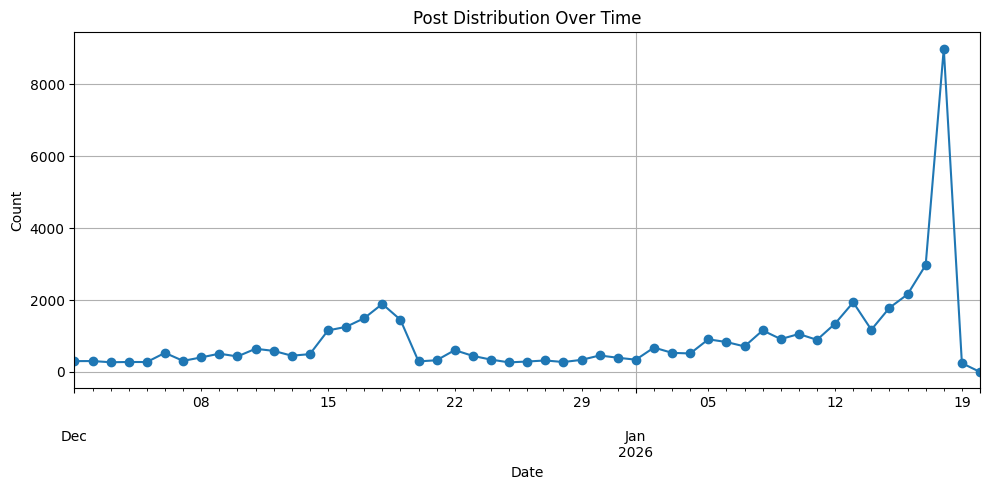

In [ ]:
daily_counts = posts_df.set_index('date').resample('D').size()

# 2. Plot the results
plt.figure(figsize=(10, 5))
daily_counts.plot(kind='line', marker='o')

plt.title('Post Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()

## Who are the most active participants in election-related conversations?


In [ ]:
import pandas as pd
import ast

# Define a function to safely parse the string and get the username
def get_username(val):
    # 1. If it's already a dictionary, just return the value
    if isinstance(val, dict):
        return val.get('userName')

    # 2. If it's a string, try to convert it to a dictionary
    if isinstance(val, str):
        try:
            # literal_eval safely evaluates a string containing a Python literal (like a dict)
            val_dict = ast.literal_eval(val)
            if isinstance(val_dict, dict):
                return val_dict.get('userName')
        except (ValueError, SyntaxError):
            # Return None if the string is malformed
            return None

    # 3. If it's NaN or anything else, return None
    return None

# Apply the function
posts_df['post author'] = posts_df['author_x'].apply(get_username)

# Check the results
print(posts_df['post author'].head())

0          gold_higs
1          gold_higs
2     Michael_Ma3255
3    CaptainEbe89058
4    bd4es8lnay65424
Name: post author, dtype: object


/tmp/ipython-input-1960242910.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df['post author'] = posts_df['author_x'].apply(get_username)


post author
grok               2063
ntvuganda           279
nbstv               248
DailyMonitor        223
newvisionwire       159
PSSEKABIR           134
SafeBoda            133
BekarSebat51443     112
Owishemwe           110
ZoomexUg             97
Name: count, dtype: int64


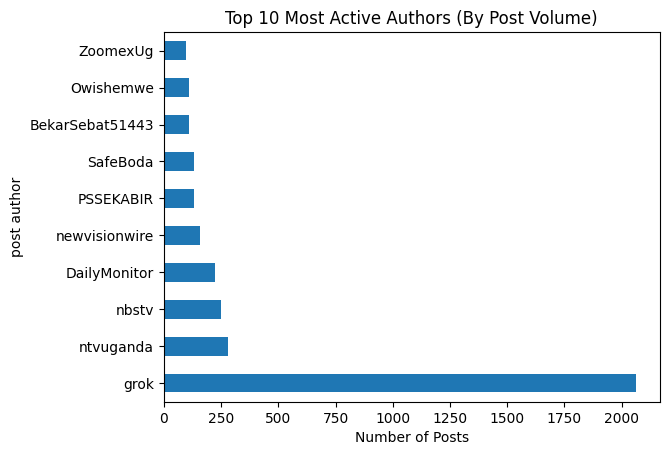

In [ ]:
# Count the number of posts per page/user
top_posters = posts_df['post author'].value_counts().head(10)

print(top_posters)

# Visualization
top_posters.plot(kind='barh', title='Top 10 Most Active Authors (By Post Volume)')
plt.xlabel('Number of Posts')
plt.show()

## analysis on original posts disitrbution

In [ ]:
posts_df['is_actual_post'] = ~posts_df['fullText'].str.startswith('RT @')
posts_df['is_actual_post'].value_counts()

/tmp/ipython-input-4145007354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df['is_actual_post'] = ~posts_df['fullText'].str.startswith('RT @')


,count
is_actual_post,
True,46562
False,1


## By Engagement (Impact)

In [ ]:
posts_df = df.drop_duplicates(subset=['twitterUrl'], keep='first').copy()

In [ ]:
posts_df['post author'] = posts_df['author_x'].apply(get_username)


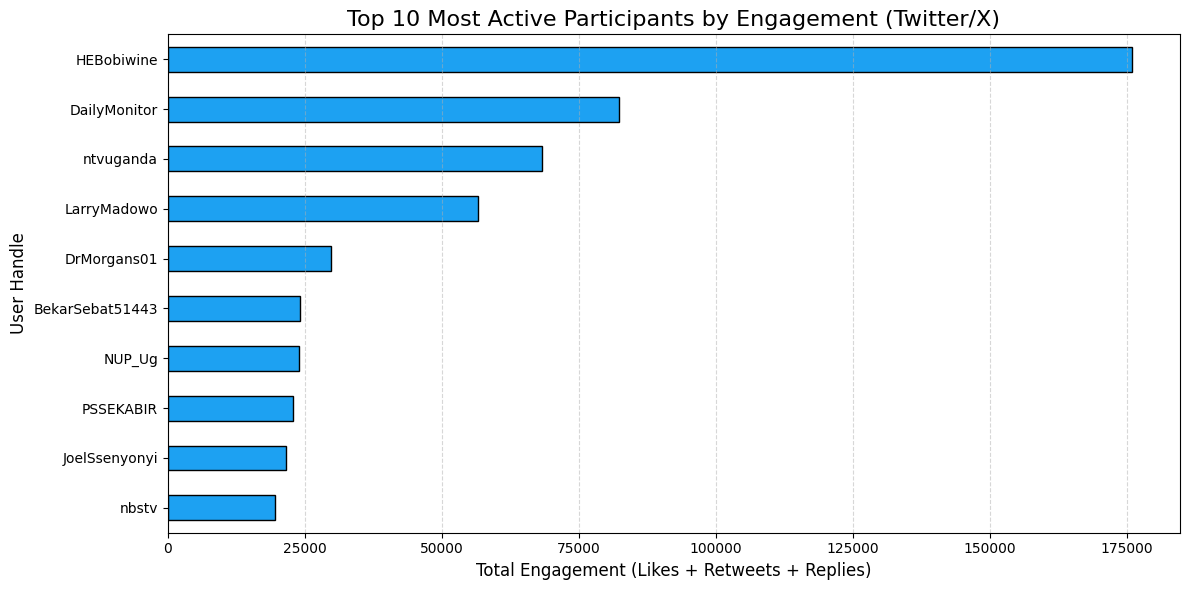

In [ ]:
metrics = ['retweetCount', 'replyCount_x', 'likeCount', 'quoteCount_x']

posts_df[metrics] = posts_df[metrics].apply(pd.to_numeric, errors='coerce').fillna(0)

posts_df['total_engagement'] = posts_df[metrics].sum(axis=1)

top_engaged = posts_df.groupby('post author')['total_engagement'].sum()

top_10_engaged = top_engaged.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))

top_10_engaged.sort_values(ascending=True).plot(
    kind='barh',
    color='#1DA1F2',
    edgecolor='black'
)

plt.title('Top 10 Most Active Participants by Engagement (Twitter/X)', fontsize=16)
plt.xlabel('Total Engagement (Likes + Retweets + Replies)', fontsize=12)
plt.ylabel('User Handle', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()

## Comparison of engagement through likes, comments and shares

<Figure size 1200x800 with 0 Axes>

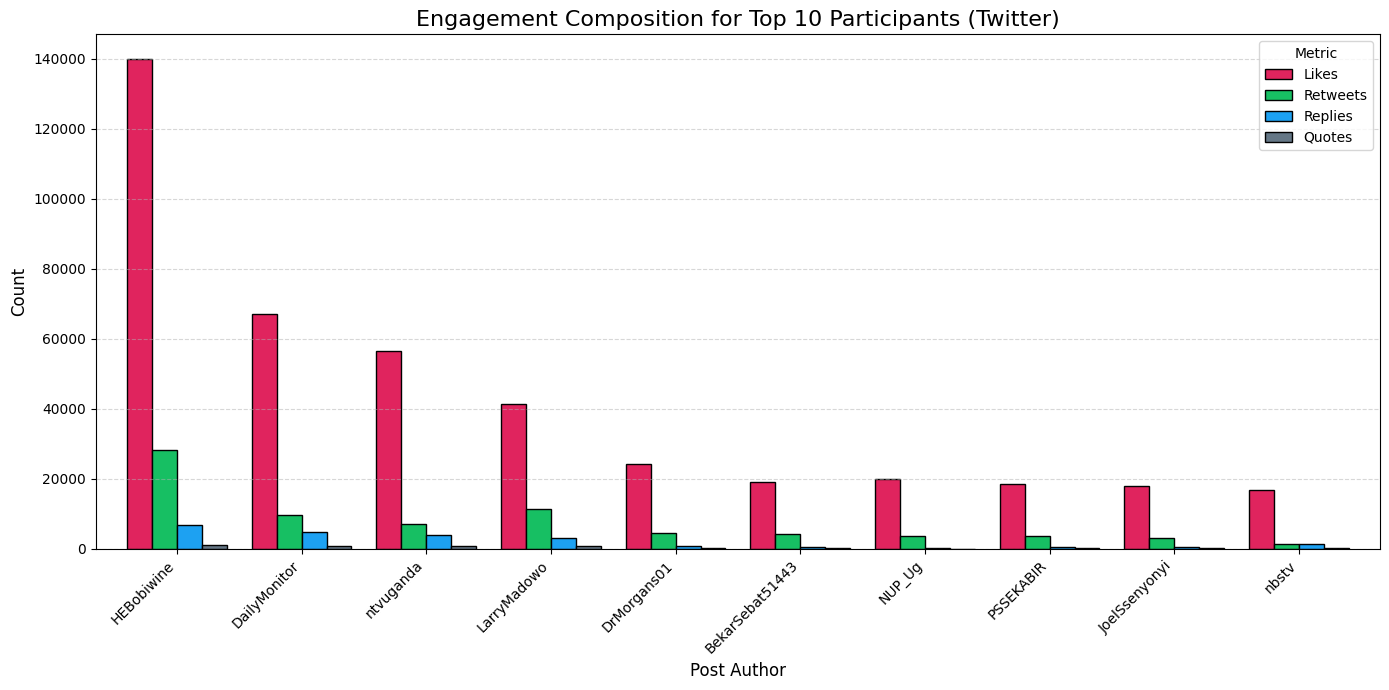

In [ ]:
metrics = ['likeCount', 'retweetCount', 'replyCount_x', 'quoteCount_x']

posts_df[metrics] = posts_df[metrics].apply(pd.to_numeric, errors='coerce').fillna(0)

author_stats = posts_df.groupby('post author')[metrics].sum()

author_stats['total_sum'] = author_stats.sum(axis=1)
top_10_breakdown = author_stats.sort_values(by='total_sum', ascending=False).head(10)

top_10_breakdown = top_10_breakdown.drop(columns=['total_sum'])

plt.figure(figsize=(12, 8))

colors = ['#E0245E', '#17BF63', '#1DA1F2', '#657786']

top_10_breakdown.plot(
    kind='bar',
    width=0.8,
    figsize=(14, 7),
    color=colors,
    edgecolor='black'
)

plt.title('Engagement Composition for Top 10 Participants (Twitter)', fontsize=16)
plt.xlabel('Post Author', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', labels=['Likes', 'Retweets', 'Replies', 'Quotes'])
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Posts type distribution



In [ ]:
import re

def clean_source(val):
    # Extracts "Twitter for iPhone" from "<a href...>Twitter for iPhone</a>"
    if pd.isna(val): return 'Unknown'
    match = re.search(r'>(.*?)<', str(val))
    return match.group(1) if match else val

def get_username(val):
    # Extracts username from stringified dicts like "{'userName': '...'}"
    if isinstance(val, dict): return val.get('userName')
    try:
        val_dict = ast.literal_eval(str(val))
        if isinstance(val_dict, dict): return val_dict.get('userName')
    except: return None
    return None


posts_df['source_clean'] = posts_df['source'].apply(clean_source)

posts_df['comment_author_handle'] = posts_df['author_y'].apply(get_username)

posts_df['post_date'] = pd.to_datetime(posts_df['date'], errors='coerce')
posts_df['comment_date'] = pd.to_datetime(posts_df['timestamp'], unit='ms', errors='coerce')

def get_post_type(row):
    if row.get('isRetweet') == True: return 'Retweet'
    if row.get('isQuote') == True: return 'Quote Tweet'
    return 'Original Post'

posts_df['post_type_label'] = posts_df.apply(get_post_type, axis=1)

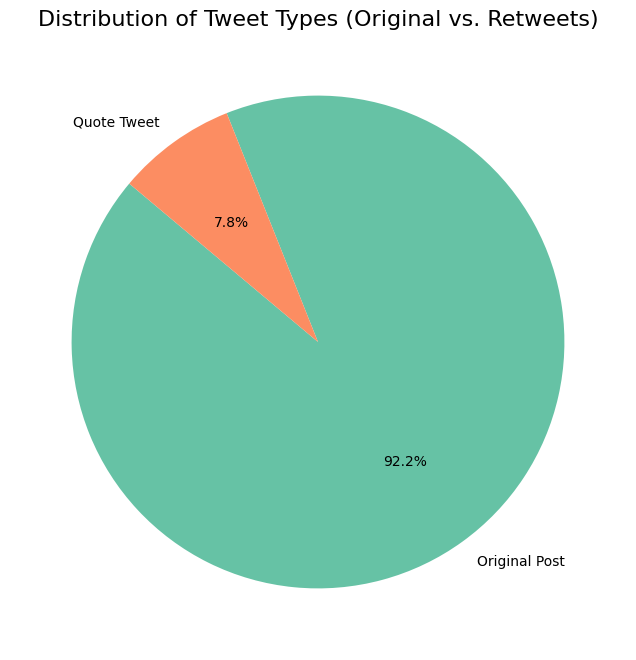

In [ ]:
plt.figure(figsize=(8, 8))
type_counts = posts_df['post_type_label'].value_counts()

plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%',
        colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'], startangle=140)
plt.title('Distribution of Tweet Types (Original vs. Retweets)', fontsize=16)
plt.show()

## Platforms being used


/tmp/ipython-input-1895550957.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sources.values, y=top_sources.index, palette='magma')


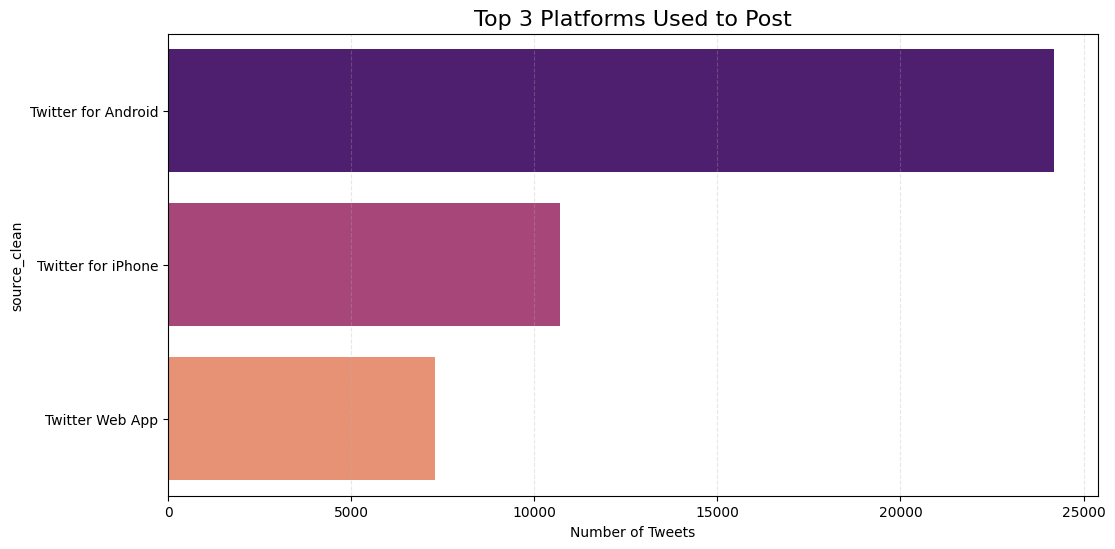

In [ ]:
plt.figure(figsize=(12, 6))
top_sources = posts_df['source_clean'].value_counts().head(3)

sns.barplot(x=top_sources.values, y=top_sources.index, palette='magma')
plt.title('Top 3 Platforms Used to Post', fontsize=16)
plt.xlabel('Number of Tweets')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()

# temporal analysis posts vs comments

In [ ]:
comments_df.columns

Index(['postUrl', 'postId', 'replyId', 'inReplyTo', 'replyUrl', 'replyText',
       'timestamp', 'conversationId_y', 'media_y', 'author_y', 'replyCount_y',
       'quoteCount_y', 'repostCount', 'favouriteCount', 'viewsCount',
       'post_url', 'post_text', 'Author Handle'],
      dtype='object')

In [ ]:
comments_df['comment_date'] = pd.to_datetime(comments_df['timestamp'], unit='ms', errors='coerce')
comments_df['comment_date']

,comment_date
6,2025-12-17 13:20:12
8,2025-12-17 12:39:00
11,2025-12-16 05:56:58
16,2025-12-13 08:26:19
23,2025-12-08 07:24:21
...,...
52829,2025-12-04 12:25:47
52833,2025-12-03 04:52:27
52835,2025-12-02 17:22:01
52836,2025-12-02 15:52:04


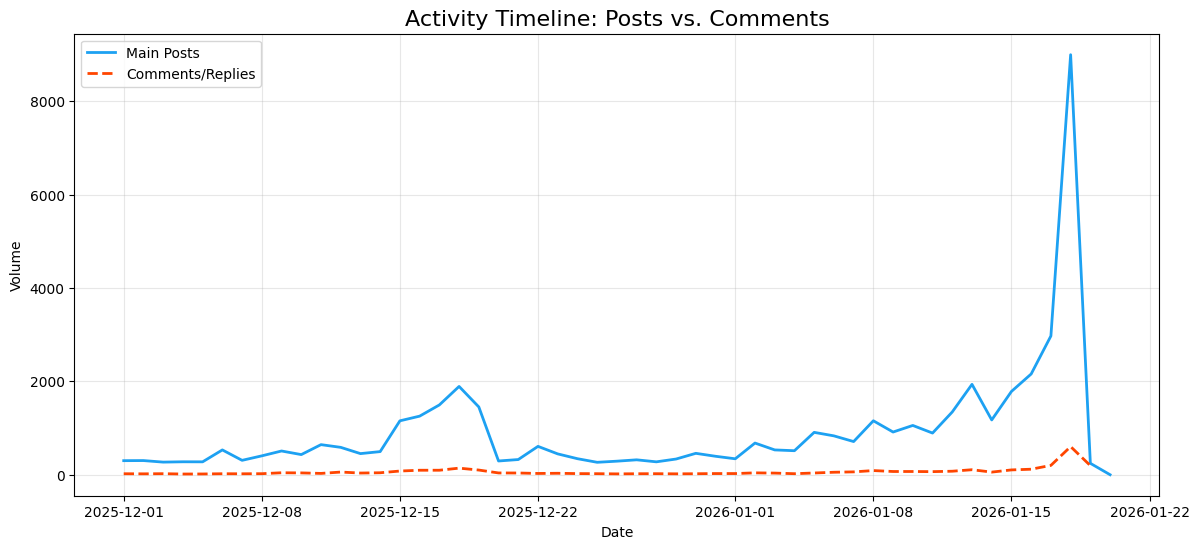

In [ ]:
# Resample by Hour or Day
posts_over_time = posts_df.set_index('post_date').resample('D').size()
comments_over_time = comments_df.set_index('comment_date').resample('D').size()

plt.figure(figsize=(14, 6))
plt.plot(posts_over_time.index, posts_over_time.values, label='Main Posts', color='#1DA1F2', linewidth=2)
plt.plot(comments_over_time.index, comments_over_time.values, label='Comments/Replies', color='#FF4500', linestyle='--', linewidth=2)

plt.title('Activity Timeline: Posts vs. Comments', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Word cloud

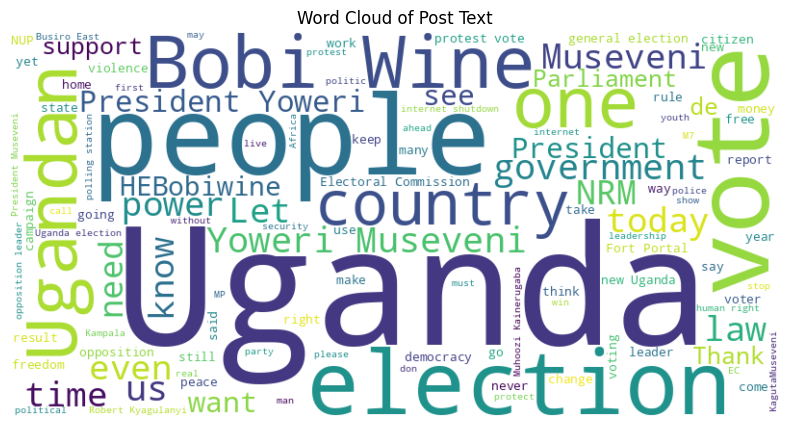

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def generate_word_cloud(df, text_column, title='Word Cloud'):
    """
    Generates and displays a word cloud from a specified text column in a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        text_column (str): The name of the column containing text data.
        title (str): The title for the word cloud plot. Default is 'Word Cloud'.
    """
    # Combine all text into a single string
    text_content = ' '.join(df[text_column].dropna().astype(str))

    # Define stopwords (you can add more if needed)
    stopwords = set(STOPWORDS)
    stopwords.update(["amp", "RT", "co", "https", "will", "The", "t", "s", "can", "u", "r", "just", "like", "get", "now", "good", "day"])

    # Generate word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=stopwords,
        min_font_size=10
    ).generate(text_content)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Call the function for the posts_df 'text' column
generate_word_cloud(posts_df, 'text', title='Word Cloud of Post Text')

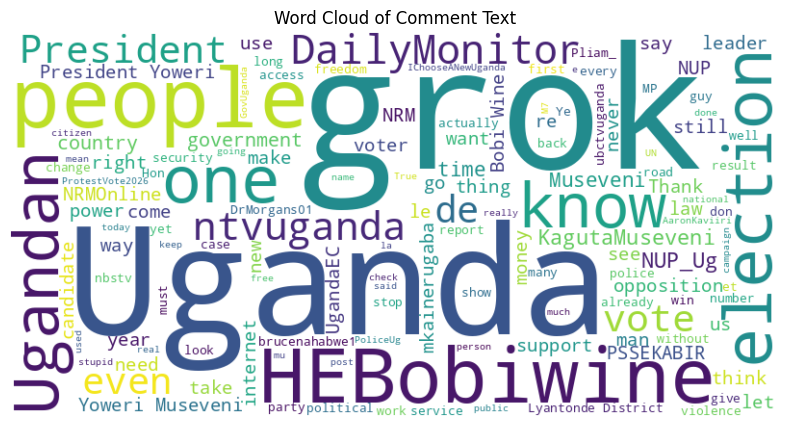

In [ ]:
# comments word cloud

generate_word_cloud(comments_df, 'replyText', title='Word Cloud of Comment Text')

# top commentors

In [ ]:
comments_df['author_y'].iloc[1]

'{\'name\': \'Bosingwa Farouk Bobi🇺🇬\', \'screenName\': \'bosingwafarouk\', \'followersCount\': 4740, \'favouritesCount\': 579054, \'friendsCount\': 4333, \'description\': "Freedom fighters they fight for freedom they don\'t ask for freedom\\n( follow back when I follow you am not your fan @Chelseafc @NUP"}'

In [ ]:
def extract_comment_handle(val, key: str = "screenName"):
    # 1. Handle missing values (NaN/None)
    if pd.isna(val) or val == "":
        return None

    # 2. If it is already a dictionary, return the screenName
    if isinstance(val, dict):
        return val.get(key)

    # 3. If it is a string, parse it safely
    if isinstance(val, str):
        try:
            val_dict = ast.literal_eval(val)

            if isinstance(val_dict, dict):
                return val_dict.get(key)

        except (ValueError, SyntaxError):
            return None

    return None

# Apply the function to your DataFrame
comments_df['comment_handle'] = comments_df['author_y'].apply(extract_comment_handle)

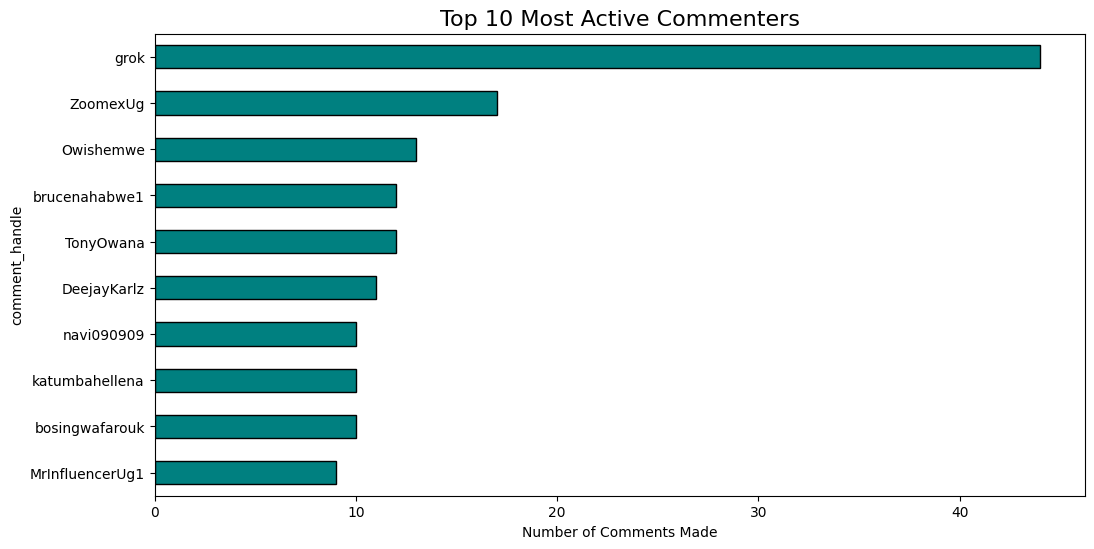

In [ ]:
plt.figure(figsize=(12, 6))
top_commenters = comments_df['comment_handle'].value_counts().head(10)

top_commenters.sort_values().plot(kind='barh', color='teal', edgecolor='black')
plt.title('Top 10 Most Active Commenters', fontsize=16)
plt.xlabel('Number of Comments Made')
plt.show()

# hashtags

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def plot_hashtags_bigrams_trigrams(
    df,
    text_col,
    top_n=15,
    stop_words='english'
):
    # ---------- HASHTAGS ----------
    hashtags = (
        df[text_col]
        .dropna()
        .astype(str)
        .str.lower()
        .apply(lambda x: re.findall(r"#(\w+)", x))
        .explode()
        .dropna()
    )

    top_tags = hashtags.value_counts().head(top_n)

    # ---------- N-GRAM FUNCTION ----------
    def extract_ngrams(text_series, n):
        vec = CountVectorizer(
            ngram_range=(n, n),
            stop_words=stop_words,
            max_features=top_n
        )
        bow = vec.fit_transform(text_series)
        sum_words = bow.sum(axis=0)

        ngrams = [
            (word, int(sum_words[0, idx]))
            for word, idx in vec.vocabulary_.items()
        ]

        return (
            pd.DataFrame(ngrams, columns=['Phrase', 'Count'])
            .sort_values('Count', ascending=False)
        )

    # ---------- TEXT CLEANING ----------
    text_clean = (
        df[text_col]
        .fillna('')
        .astype(str)
        .str.lower()
        # remove URLs
        .str.replace(r'https?://\S+', '', regex=True)
        # remove standalone RT
        .str.replace(r'\brt\b', '', regex=True)
        # normalize spaces
        .str.replace(r'\s+', ' ', regex=True)
        .str.strip()
    )

    df_bigrams = extract_ngrams(text_clean, 2)
    df_trigrams = extract_ngrams(text_clean, 3)

    # ---------- PLOTTING ----------
    fig, axes = plt.subplots(3, 1, figsize=(16, 18))

    # Hashtags
    sns.barplot(
        x=top_tags.values,
        y=top_tags.index,
        ax=axes[0],
        palette='cool'
    )
    axes[0].set_title(f'Top {top_n} Dominant Hashtags')
    axes[0].set_xlabel('Count')
    axes[0].set_ylabel('Hashtag')

    # Bigrams
    sns.barplot(
        data=df_bigrams,
        x='Count',
        y='Phrase',
        ax=axes[1],
        palette='autumn'
    )
    axes[1].set_title(f'Top {top_n} Recurring Narratives (Bigrams)')
    axes[1].set_xlabel('Count')
    axes[1].set_ylabel('Phrase')

    # Trigrams
    sns.barplot(
        data=df_trigrams,
        x='Count',
        y='Phrase',
        ax=axes[2],
        palette='viridis'
    )
    axes[2].set_title(f'Top {top_n} Recurring Narratives (Trigrams)')
    axes[2].set_xlabel('Count')
    axes[2].set_ylabel('Phrase')

    plt.tight_layout()
    plt.show()


/tmp/ipython-input-3477507102.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3477507102.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3477507102.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


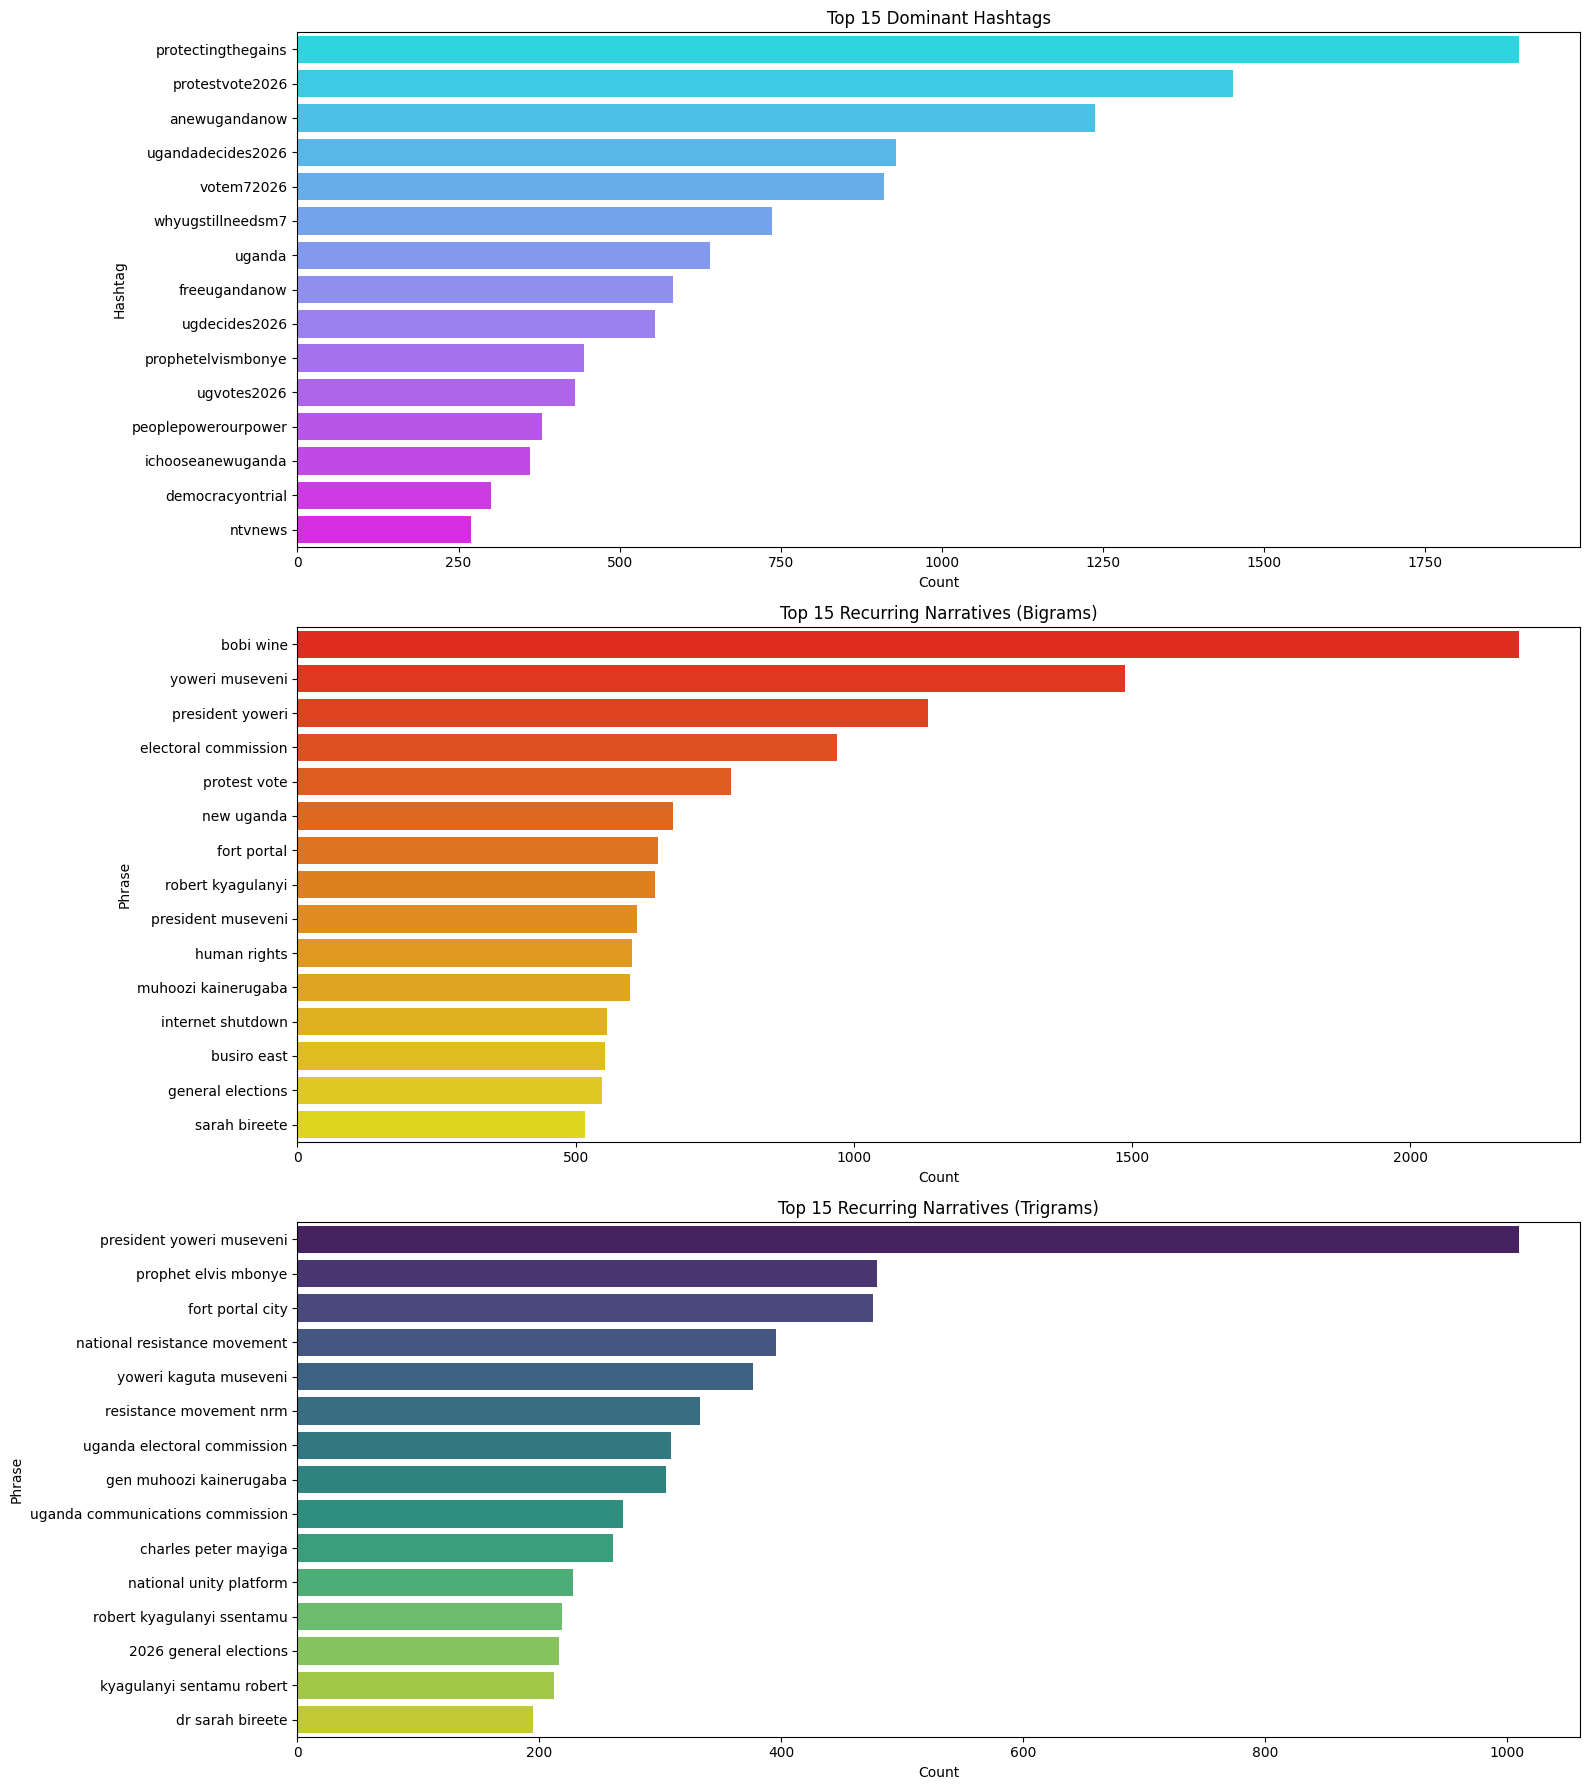

In [ ]:
plot_hashtags_bigrams_trigrams(posts_df, "text")

### comments

/tmp/ipython-input-3477507102.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3477507102.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3477507102.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


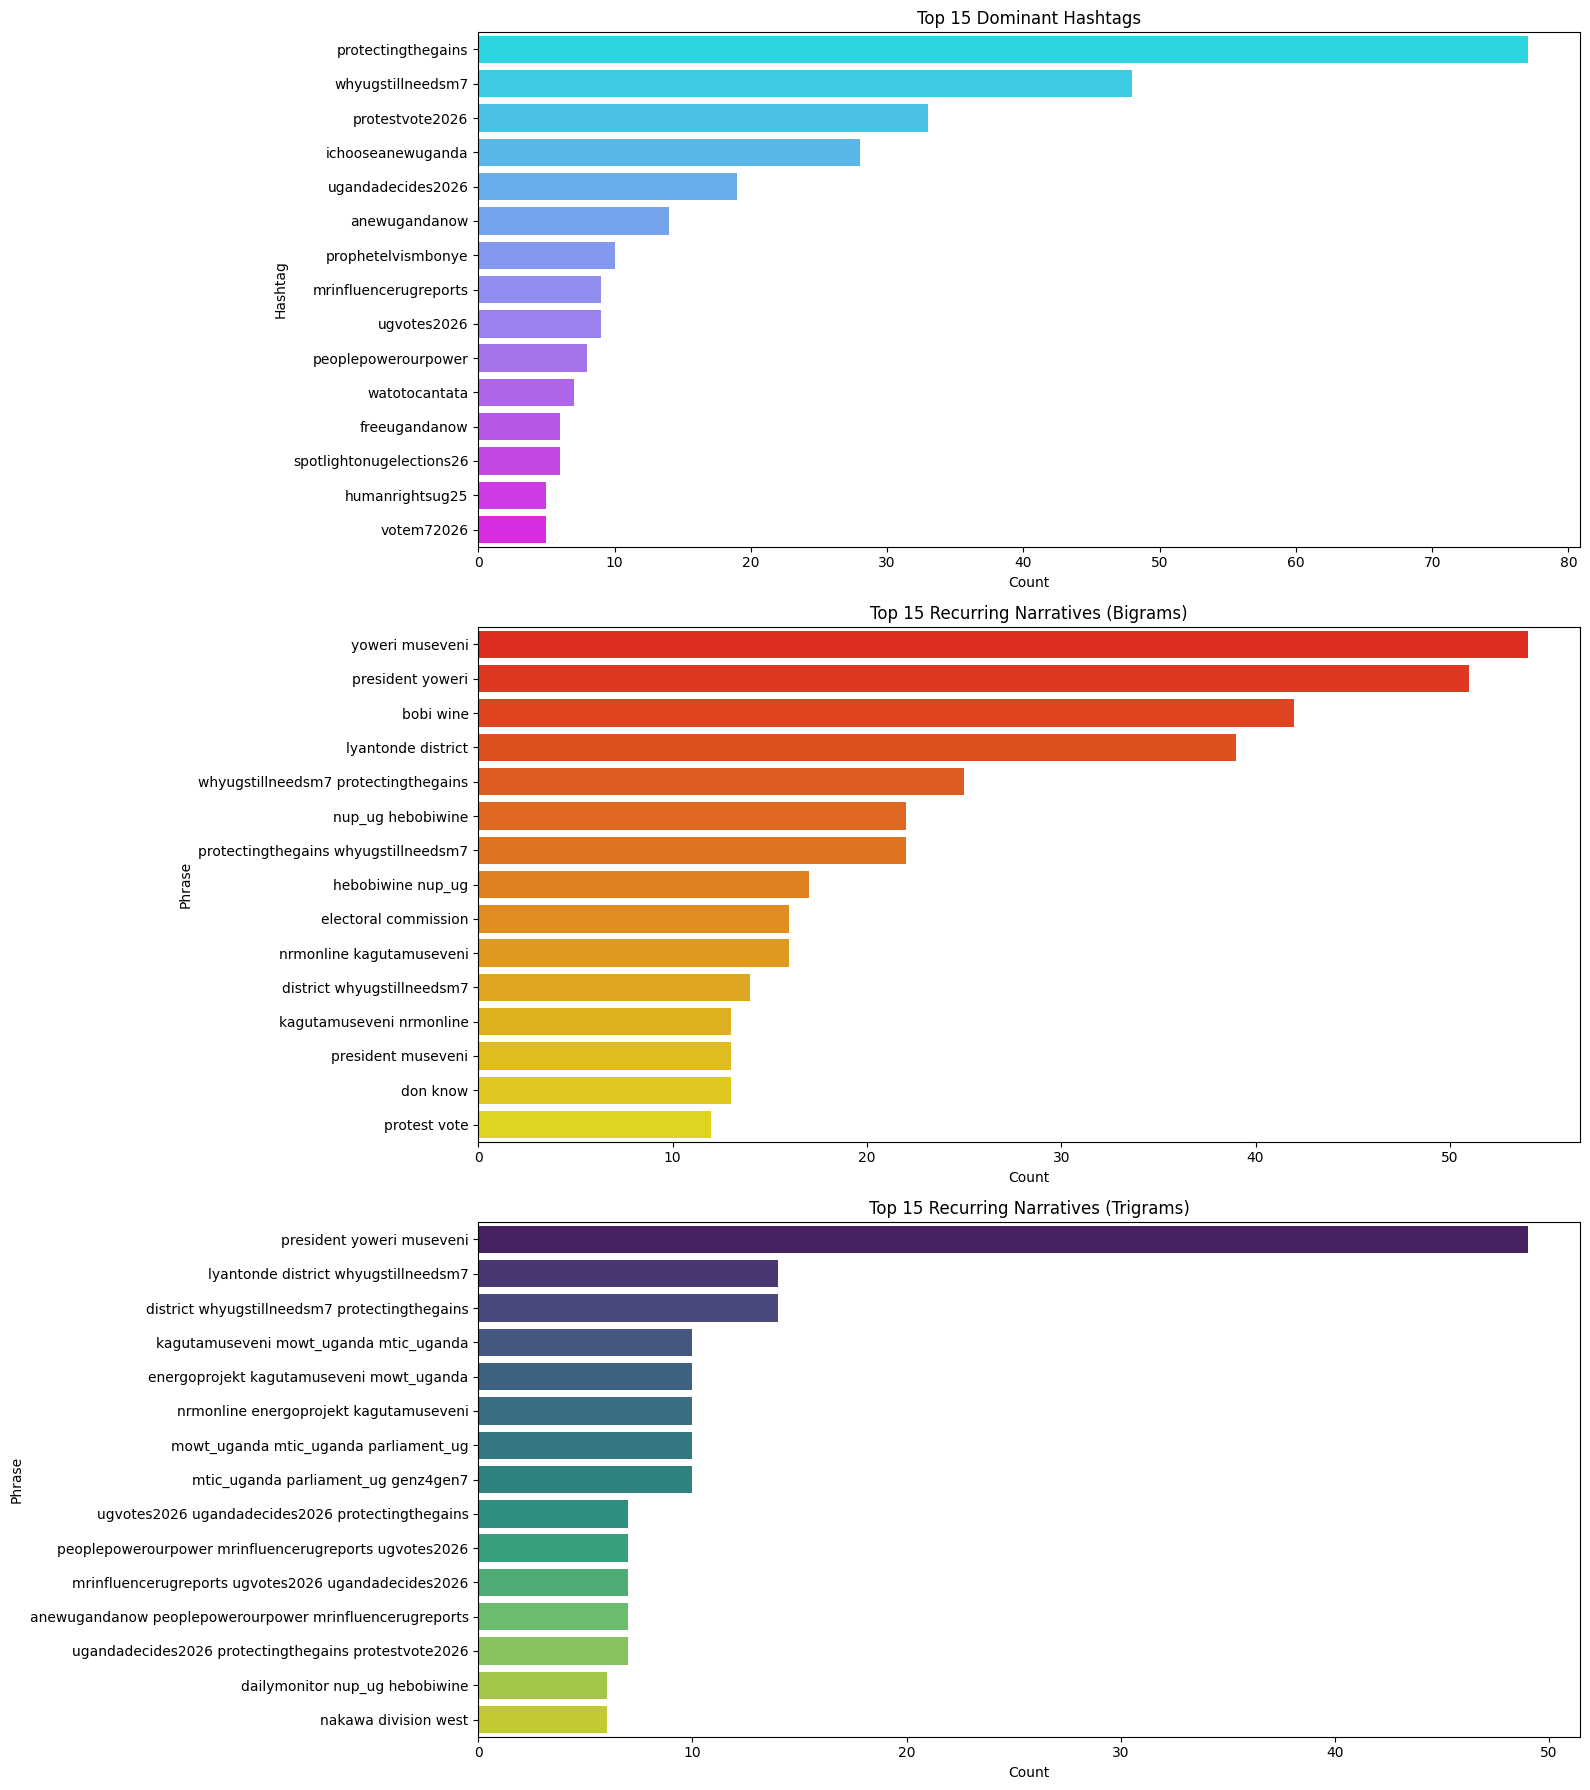

In [ ]:
plot_hashtags_bigrams_trigrams(comments_df, "replyText")

# posts hashtags overtime

In [ ]:
posts_df['hashtags'] = posts_df['text'].apply(lambda x: re.findall(r"#(\w+)", str(x)))

/tmp/ipython-input-297914411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df['hashtags'] = posts_df['text'].apply(lambda x: re.findall(r"#(\w+)", str(x)))


,hashtags
0,[WhyUgStillNeedsM7]
1,[WhyUgStillNeedsM7]
2,"[WhyUgStillNeedsM7, SoarToNamboole, PearlOfAfr..."
3,"[NRM, YouthSkilling, WhyUgStillNeedsM7]"
4,"[WorldOfCoffee, WhyUgStillNeedsM7, TopTierUgFo..."
...,...
52838,[AgafaeEyo]
52839,[]
52840,[ExpressUpdates]
52841,[CelebPatrol]


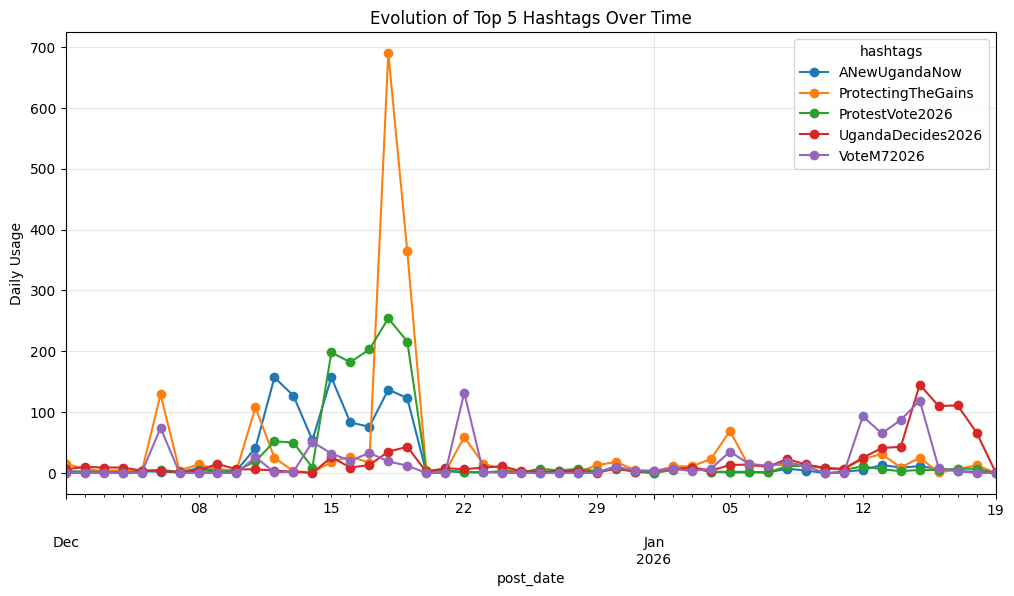

In [ ]:
all_tags = posts_df['hashtags'].explode().dropna()
top_5 = all_tags.value_counts().head(5).index.tolist()

# Filter and explode
df_tags = posts_df[['post_date', 'hashtags']].explode('hashtags')
df_tags = df_tags[df_tags['hashtags'].isin(top_5)]

# Resample
evolution = df_tags.groupby(['post_date', 'hashtags']).size().unstack(fill_value=0).resample('D').sum()

plt.figure(figsize=(12, 6))
evolution.plot(marker='o', ax=plt.gca())
plt.title('Evolution of Top 5 Hashtags Over Time')
plt.ylabel('Daily Usage')
plt.grid(True, alpha=0.3)

# Analysis on political party mention

In [ ]:
eng_metrics = ['likeCount', 'retweetCount', 'replyCount_x', 'quoteCount_x']
for col in eng_metrics:
    posts_df[col] = pd.to_numeric(posts_df[col], errors='coerce').fillna(0)

posts_df['total_engagement'] = posts_df[eng_metrics].sum(axis=1)

# Define the Parties and their Keywords
party_keywords = {
    'NUP': [r'\bnup\b', r'\bbobi wine\b', r'\bbobi\b'],
    'NRM': [r'\bnrm\b', r'\byoweri\b', r'\bmuseveni\b', r'\bsevo\b'],
    'FDC': [r'\bfdc\b', r'\bbesigye\b'],
    'PDP': [r'\bpdp\b'],
    'DP':  [r'\bdp\b']
}

# Function to check mentions
def check_party_mention(text, patterns):
    if pd.isna(text):
        return 0
    text_lower = str(text).lower()
    for pattern in patterns:
        if re.search(pattern, text_lower):
            return 1
    return 0

# Apply the function to 'fullText'
for party, patterns in party_keywords.items():
    posts_df[f'mention_{party}'] = posts_df['fullText'].apply(lambda x: check_party_mention(x, patterns))

# 5. Aggregate Data
party_stats = []

for party in party_keywords.keys():
    # Filter rows where this party was mentioned
    party_data = posts_df[posts_df[f'mention_{party}'] == 1]

    # Calculate stats
    count = len(party_data)
    avg_eng = party_data['total_engagement'].mean() if count > 0 else 0

    party_stats.append({
        'Party': party,
        'Post_Volume': count,
        'Avg_Engagement': avg_eng
    })

stats_df = pd.DataFrame(party_stats).sort_values(by='Post_Volume', ascending=False)
print(stats_df)

/tmp/ipython-input-1383518603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df[col] = pd.to_numeric(posts_df[col], errors='coerce').fillna(0)
/tmp/ipython-input-1383518603.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df['total_engagement'] = posts_df[eng_metrics].sum(axis=1)
/tmp/ipython-input-1383518603.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

  Party  Post_Volume  Avg_Engagement
1   NRM         6574       44.559781
0   NUP         3245       74.805239
2   FDC          301       67.897010
4    DP           55       58.472727
3   PDP            2        0.000000


/tmp/ipython-input-1383518603.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df[f'mention_{party}'] = posts_df['fullText'].apply(lambda x: check_party_mention(x, patterns))


/tmp/ipython-input-2998536875.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


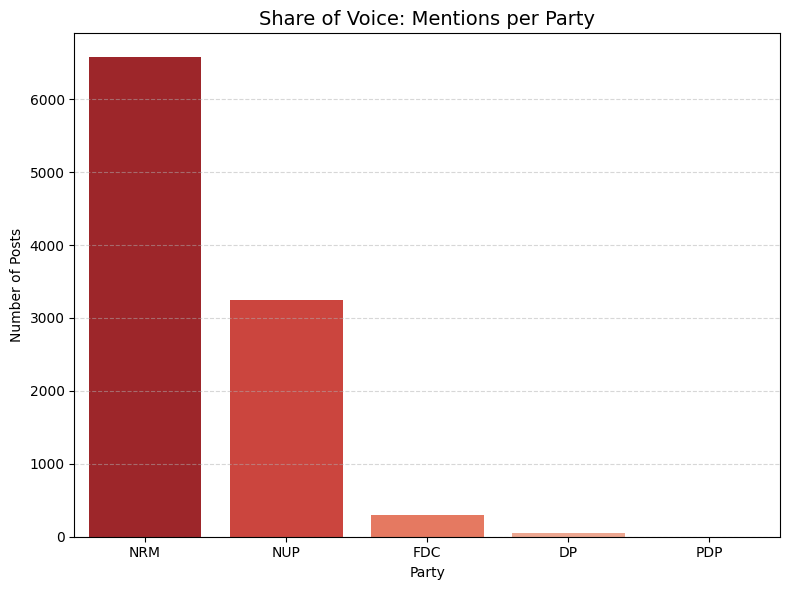

In [ ]:
plt.figure(figsize=(8, 6))

sns.barplot(
    data=stats_df,
    x='Party',
    y='Post_Volume',
    palette='Reds_r'
)

plt.title('Share of Voice: Mentions per Party', fontsize=14)
plt.ylabel('Number of Posts')
plt.xlabel('Party')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipython-input-848586865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


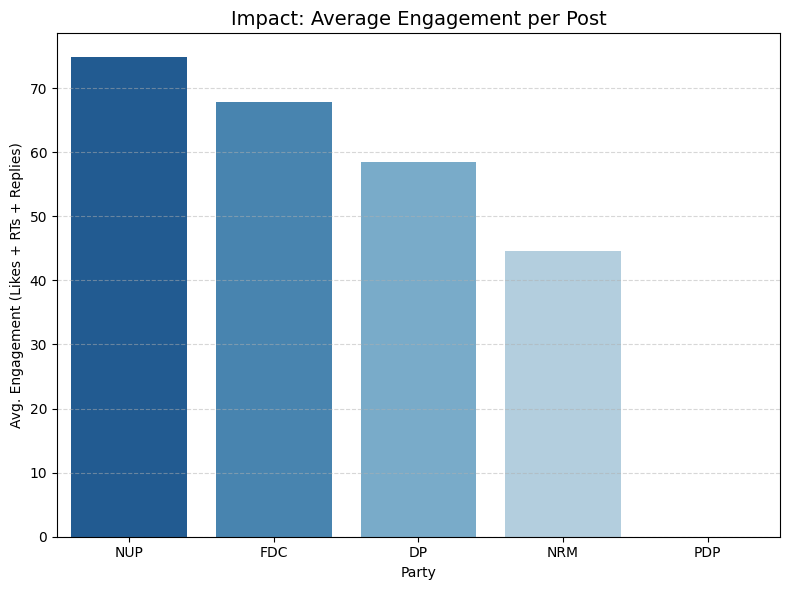

In [ ]:
# Sort by engagement
stats_df_eng = stats_df.sort_values(by='Avg_Engagement', ascending=False)

plt.figure(figsize=(8, 6))

sns.barplot(
    data=stats_df_eng,
    x='Party',
    y='Avg_Engagement',
    palette='Blues_r'
)

plt.title('Impact: Average Engagement per Post', fontsize=14)
plt.ylabel('Avg. Engagement (Likes + RTs + Replies)')
plt.xlabel('Party')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




# Political party Engagement overtime




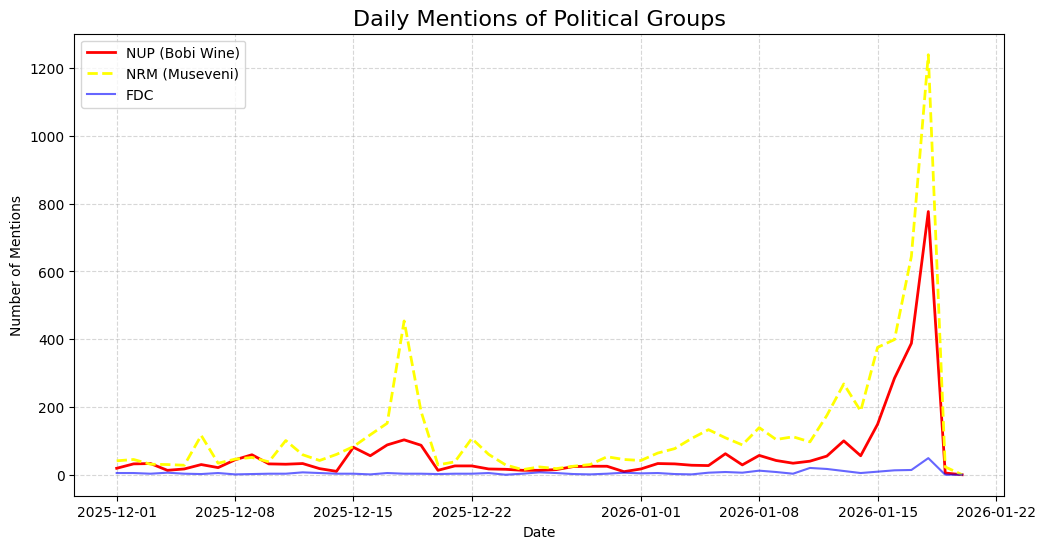

In [ ]:
# Select the party columns + date
df_time = posts_df[['date', 'mention_NUP', 'mention_NRM', 'mention_FDC', 'mention_DP', 'mention_PDP']].copy()

# Set date index and resample by Day or Week
party_time = df_time.set_index('date').resample('D').sum()

# Plot
plt.figure(figsize=(12, 6))
# Plotting specific columns
plt.plot(party_time.index, party_time['mention_NUP'], label='NUP (Bobi Wine)', color='red', linewidth=2)
plt.plot(party_time.index, party_time['mention_NRM'], label='NRM (Museveni)', color='yellow', linewidth=2, linestyle='--')
plt.plot(party_time.index, party_time['mention_FDC'], label='FDC', color='blue', alpha=0.6)

plt.title('Daily Mentions of Political Groups', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Mentions')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Bot analysis

In [ ]:
AI_KEYWORDS = [
    "grok", "grok ai", "xai",
    "chatgpt", "gpt", "openai",
    "ai generated", "generated by ai",
    "artificial intelligence"
]

# This wraps every keyword in \b boundaries automatically
# Results in: \bgrok\b|\bgrok ai\b|\bxai\b ...
pattern_string = "|".join([rf"\b{re.escape(k)}\b" for k in AI_KEYWORDS])
pattern = re.compile(pattern_string, re.IGNORECASE)

# Optimized Pandas application
posts_df["mentions_ai"] = posts_df["text"].str.contains(pattern, na=False)

In [ ]:
posts_df[posts_df["mentions_ai"]].sample(5)[["date", "text"]]


,date,text
28119,2026-01-06 03:22:48+00:00,@grok @anders_aslund Is a foreign citizen move...
41606,2026-01-18 19:51:23+00:00,"@grok Ok thank you, also give me those of nyen..."
32114,2026-01-18 17:58:48+00:00,@ubctvuganda @grok remove the population of th...
41520,2026-01-01 16:16:19+00:00,@grok @MpuugaYaly36540 @UgandaEC @UgandaMediaC...
40214,2026-01-18 23:58:51+00:00,@tom4th69_aaa @grok\nاذكر لنا البحوث العلمية ف...


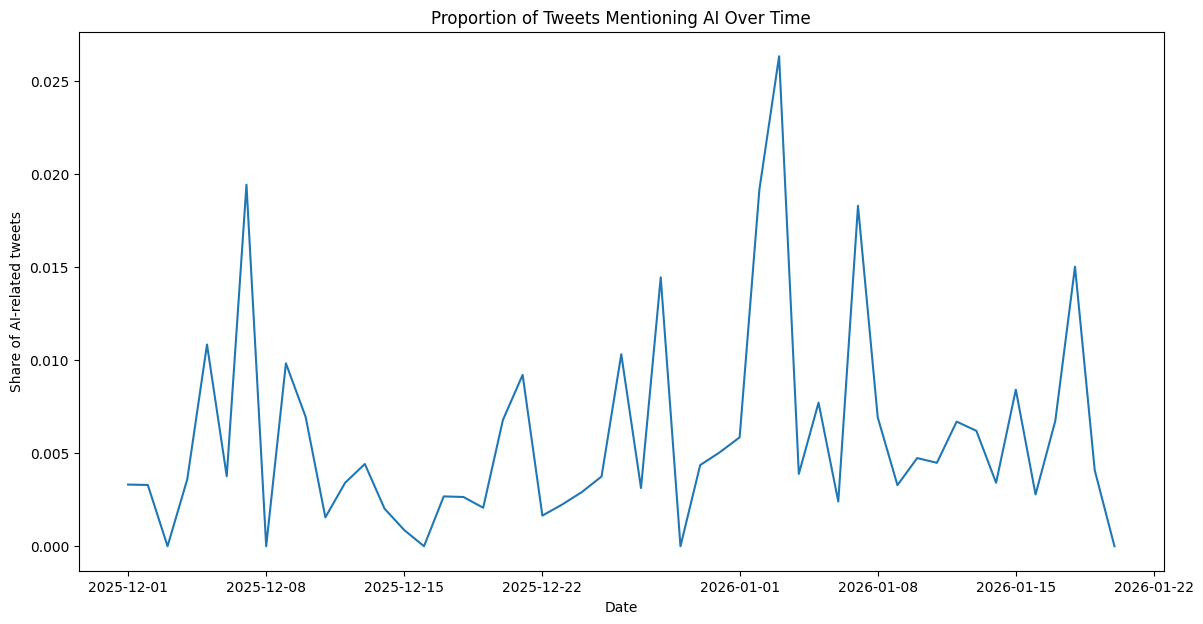

In [ ]:
daily_ai = (
    posts_df
    .groupby(posts_df["date"].dt.date)["mentions_ai"]
    .mean()
)

plt.figure(figsize=(14, 7))
daily_ai.plot()
plt.title("Proportion of Tweets Mentioning AI Over Time")
plt.ylabel("Share of AI-related tweets")
plt.xlabel("Date")
plt.show()

# AI disitrbtion

In [ ]:
AI_PATTERNS = {
    "Grok": r"\bgrok\b",
    "ChatGPT": r"\bchatgpt\b|\bgpt[- ]?[34]\b",
    "Gemini" : r"\bnanobanana\b",
    "Claude" : r"\bclaude\b",
    "Other AI": r"\bai generated\b|\bgenerated by ai\b|\bllm\b"
}

def detect_ai_type(text):
    text = str(text).lower()
    for ai, pattern in AI_PATTERNS.items():
        if re.search(pattern, text):
            return ai
    return "No Mention"

posts_df["ai_type"] = posts_df["text"].apply(detect_ai_type)


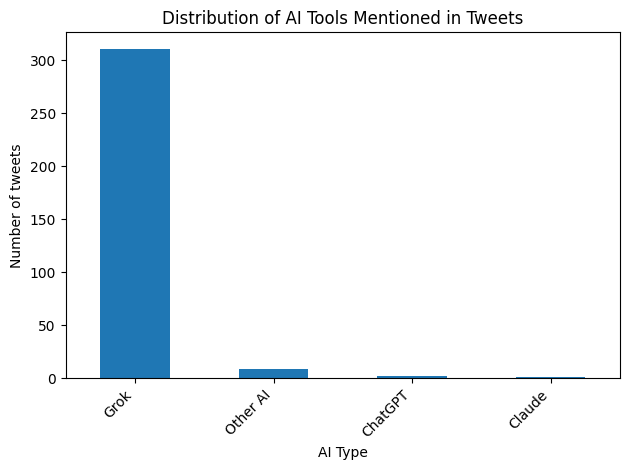

In [ ]:
ai_dist = posts_df[posts_df['ai_type'] != "No Mention"]["ai_type"].value_counts()

# 2. Plotting (without plt.figure() and using savefig)
ai_dist.plot(kind="bar")

plt.title("Distribution of AI Tools Mentioned in Tweets")
plt.ylabel("Number of tweets")
plt.xlabel("AI Type")

# Ensure labels are readable and not truncated
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## overtime usage of ai

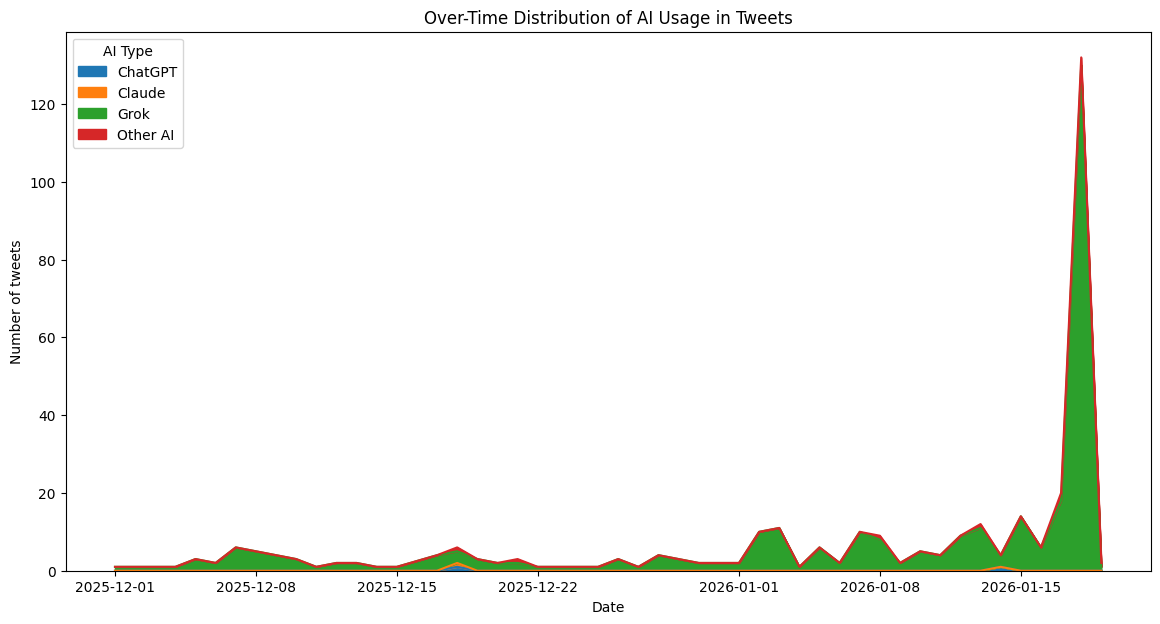

In [ ]:
daily_ai_dist = (
    posts_df[posts_df['ai_type'] != "No Mention"]
    .groupby([posts_df["date"].dt.date, "ai_type"])
    .size()
    .unstack(fill_value=0)
)

plt.figure(figsize=(14, 7))
daily_ai_dist.plot(kind="area", stacked=True, ax=plt.gca())
plt.title("Over-Time Distribution of AI Usage in Tweets")
plt.ylabel("Number of tweets")
plt.xlabel("Date")
plt.legend(title="AI Type")
plt.show()

## Zero shot text classification

In [ ]:
AI_USAGE_LABELS = [
    "Topic or information request about a person or event",
    "AI news, policy discussion, or media reporting",
    "Political persuasion or opinion shaping",
    "Content generation request",
    "Image or appearance manipulation request",
    "Sexual or sexualized manipulation using AI",
    "Attack, harassment, or abuse",
    "Other or unclear AI usage"
]


In [ ]:
from transformers import pipeline

KeyboardInterrupt: 

In [ ]:
classifier = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli",
)


In [ ]:
from tqdm.auto import tqdm

def zero_shot_classify(texts, batch_size=8):
    results = []

    for i in tqdm(
        range(0, len(texts), batch_size),
        desc="Zero-shot AI usage classification",
        unit="batch"
    ):
        batch = texts[i:i + batch_size]

        outputs = classifier(
            batch,
            AI_USAGE_LABELS,
            multi_label=False
        )

        for out in outputs:
            results.append(out["labels"][0])

    return results


In [ ]:
ai_posts = posts_df[posts_df["ai_type"] != "No Mention"].copy()

ai_posts.shape

In [ ]:
ai_posts["ai_usage_zeroshot"] = zero_shot_classify(
    ai_posts["text"].astype(str).tolist(),
    batch_size=8
)


# Accounts with repeated AI mention

In [ ]:
ai_users = (
    posts_df[posts_df["mentions_ai"]]
    .groupby("post author")
    .size()
    .sort_values(ascending=False)
)

ai_users.head(10)


In [ ]:
plt.figure()
ai_users.head(20).plot(kind="bar")
plt.title("Top Accounts Mentioning AI")
plt.ylabel("Number of tweets")
plt.show()


In [ ]:
# Create a mask for rows that mention AI AND have 'grok' in the twitterUrl
mask = (posts_df["mentions_ai"]) & (posts_df["twitterUrl"].str.contains("grok", case=False, na=False))

# Filter the specific columns and convert to values
filtered_results = posts_df[mask][['twitterUrl', 'text', 'ai_type']].values

print(filtered_results)

In [ ]:
posts_df[posts_df["mentions_ai"]][['twitterUrl','text', 'ai_type']].values

# Topics associated with AI tools

In [ ]:

# 1. Get the distribution
manip_dist = ai_posts["ai_usage_zeroshot"].value_counts()

# 2. Create a larger figure FIRST
plt.figure(figsize=(14, 7))  # wider figure for long labels

# 3. Create the bar plot
ax = manip_dist.plot(kind="bar", color="skyblue")

# 4. Add counts on top of bars
ax.bar_label(ax.containers[0], padding=3)

# 5. Styling and labels
plt.title("Distribution of AI Mention Types", fontsize=14)
plt.ylabel("Number of posts")
plt.xlabel("AI Response Type")

# 6. Rotate labels and align
plt.xticks(rotation=45, ha="right")

# 7. Extra margin at bottom for long labels
plt.subplots_adjust(bottom=0.35)

plt.show()


In [ ]:
ai_posts[['twitterUrl', 'text', 'ai_usage_zeroshot', 'ai_type']].iloc[21].values

## monitoring grok posts

In [ ]:
grok_posts = posts_df[posts_df["post author"] == "grok"].copy()

grok_posts.shape

In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)        # URLs
    text = re.sub(r"@\w+", "", text)           # mentions
    text = re.sub(r"#\w+", "", text)           # hashtags
    text = re.sub(r"[^a-z\s]", "", text)       # punctuation/numbers
    return text


In [ ]:
ai_text = " ".join(
    ai_posts["text"].apply(clean_text)
)

wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    stopwords=STOPWORDS,
    collocations=False
).generate(ai_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of AI-Related Election Posts")
plt.show()


## AI manipulation analysis

In [ ]:
import pandas as pd


In [ ]:
AI_RESPONSE_CLASSES = [
    "Informational or explanatory response",
    "Political opinion or persuasive response",
    "Textual content or creative output",
    "Manipulated or transformed image or media",
    "Sexual or sexualized manipulated content",
    "Abusive, attacking, or harassing content",
    "News, policy, or public discussion referencing AI outputs or AI behavior",
    "No clear response or output"
]


In [ ]:
text = "Government demands Musk's X deals with appalling Grok AI deepfakes"

result = classifier(
    text,
    AI_RESPONSE_CLASSES,
    multi_label=False
)

result


In [ ]:

def zero_shot_classify(texts, batch_size=8):
    results = []

    for i in tqdm(
        range(0, len(texts), batch_size),
        desc="Zero-shot AI usage classification",
        unit="batch"
    ):
        batch = texts[i:i + batch_size]

        outputs = classifier(
            batch,
            AI_RESPONSE_CLASSES,
            multi_label=False
        )

        for out in outputs:
            results.append(out["labels"][0])

    return results


In [ ]:
grok_posts["ai_usage_zeroshot"] = zero_shot_classify(
    grok_posts["text"].astype(str).tolist(),
    batch_size=8
)


In [ ]:
manip_dist = grok_posts["ai_usage_zeroshot"].value_counts()

plt.figure()
manip_dist.plot(kind="bar")
plt.title("Distribution of AI(Grok) generated responses")
plt.ylabel("Number of posts")
plt.xlabel("Manipulation Type")
plt.show()


In [ ]:
grok_posts[['twitterUrl', 'text', 'ai_usage_zeroshot']].iloc[21].values

# Sentiment analysis

In [ ]:
posts_df.columns

Index(['type', 'id', 'url', 'twitterUrl', 'text', 'fullText', 'source',
       'retweetCount', 'replyCount_x', 'likeCount', 'quoteCount_x',
       'viewCount', 'createdAt', 'lang', 'bookmarkCount', 'isReply',
       'conversationId_x', 'isPinned', 'author_x', 'extendedEntities', 'card',
       'place', 'entities', 'isRetweet', 'retweet', 'isQuote', 'media_x',
       'isConversationControlled', 'possiblySensitive', 'inReplyToId',
       'inReplyToUserId', 'inReplyToUsername', 'quoteId', 'quote', 'postUrl',
       'postId', 'replyId', 'inReplyTo', 'replyUrl', 'replyText', 'timestamp',
       'conversationId_y', 'media_y', 'author_y', 'replyCount_y',
       'quoteCount_y', 'repostCount', 'favouriteCount', 'viewsCount',
       'post_url', 'post_text', 'Author Handle', 'accounts_type', 'sentiment',
       'sentiment reply', 'sentiment_score', 'emotion reply', 'emotion_score',
       'date', 'post author', 'total_engagement', 'source_clean',
       'comment_author_handle', 'post_date', 'comm

In [ ]:
posts_df['sentiment reply'].value_counts()

,count
sentiment reply,
LABEL_1,25469
LABEL_0,13989
LABEL_2,7105


In [ ]:
posts_df['emotion reply'].value_counts()

,count
emotion reply,
neutral,36937
curiosity,1359
gratitude,1212
approval,1160
admiration,779
amusement,596
annoyance,539
disapproval,493
caring,480


In [ ]:
sentiment_mapping = {
    'LABEL_0': 'Negative',
    'LABEL_1': 'Neutral',
    'LABEL_2': 'Positive'
}

posts_df['sentiment reply'] = posts_df['sentiment reply'].map(sentiment_mapping)

posts_df.rename(columns={'sentiment reply': 'post sentiment'}, inplace=True)

posts_df['post sentiment'].value_counts()

,count
post sentiment,
Neutral,25469
Negative,13989
Positive,7105


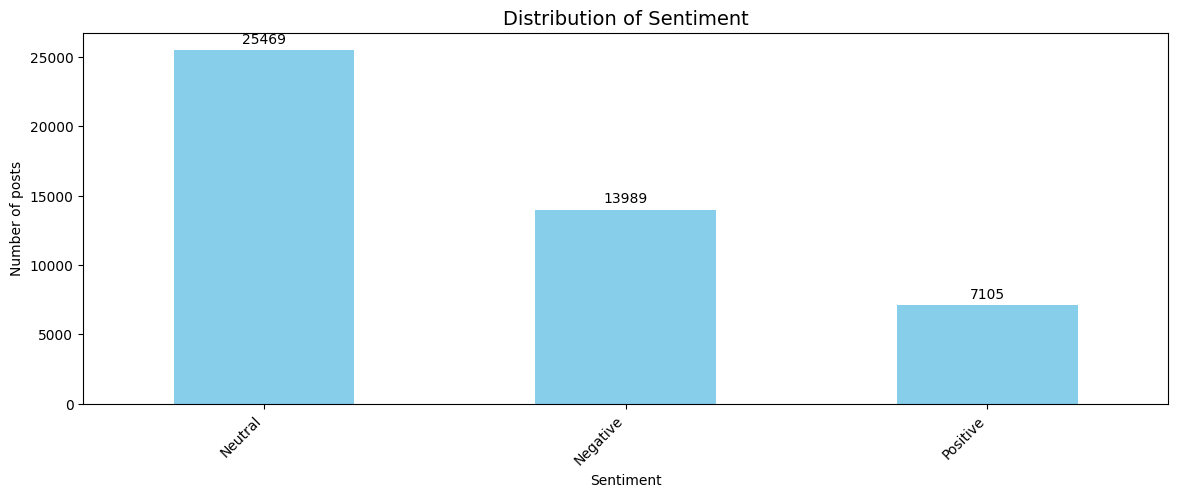

In [ ]:

# 1. Get the distribution
manip_dist = posts_df["post sentiment"].value_counts()

# 2. Create a larger figure FIRST
plt.figure(figsize=(14, 7))  # wider figure for long labels

# 3. Create the bar plot
ax = manip_dist.plot(kind="bar", color="skyblue")

# 4. Add counts on top of bars
ax.bar_label(ax.containers[0], padding=3)

# 5. Styling and labels
plt.title("Distribution of Sentiment", fontsize=14)
plt.ylabel("Number of posts")
plt.xlabel("Sentiment")

# 6. Rotate labels and align
plt.xticks(rotation=45, ha="right")

# 7. Extra margin at bottom for long labels
plt.subplots_adjust(bottom=0.35)

plt.show()


### sentiment distribution overtime

In [ ]:
# sentiment disitrbti
posts_df['week'] = posts_df['date'].dt.to_period('W').apply(lambda r: r.start_time)

weekly_counts = (
    posts_df.groupby(['week', 'post sentiment'])
      .size()
      .reset_index(name='count')
)


/tmp/ipython-input-3147471285.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  posts_df['week'] = posts_df['date'].dt.to_period('W').apply(lambda r: r.start_time)


In [ ]:
weekly_leader = (
    weekly_counts
    .sort_values(['week', 'count'], ascending=[True, False])
    .drop_duplicates('week')
)

# weekly_leader now has one sentiment per week
print(weekly_leader.head())


         week post sentiment  count
1  2025-12-01        Neutral   1117
4  2025-12-08        Neutral   1977
7  2025-12-15        Neutral   4320
10 2025-12-22        Neutral   1268
13 2025-12-29        Neutral   1618


<Axes: xlabel='week'>

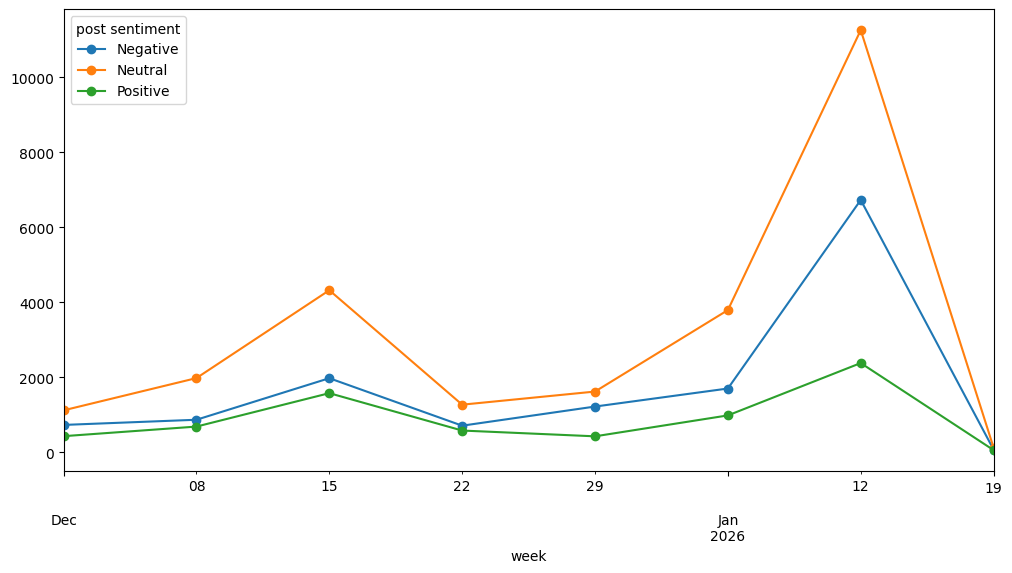

In [ ]:
weekly_pivot = weekly_counts.pivot(
    index='week',
    columns='post sentiment',
    values='count'
).fillna(0)

weekly_pivot.plot(kind='line', marker='o', figsize=(12,6))

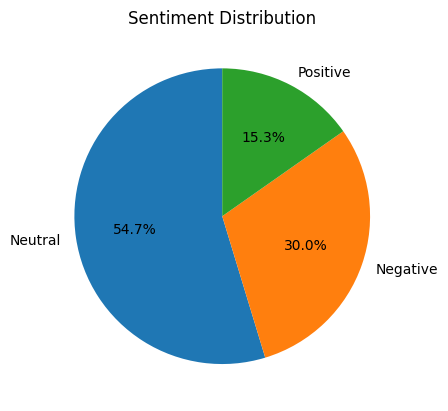

In [ ]:
posts_df['post sentiment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)

plt.ylabel('')  # removes default ylabel
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
posts_df[posts_df['post sentiment'] == 'Positive']['text'].iloc[40]

'Video: The People’s President is addressing massive crowds of supporters in Kaperebyong who have gathered to listen, be inspired, and receive the message of a New Uganda.\n#ANewUgandaNow \n#IChooseANewUganda https://t.co/OQjoLwA2wa'

## Author sentiment distribution

In [ ]:
author_sent = (
    posts_df.groupby(['post author', 'post sentiment'])
      .size()
      .unstack(fill_value=0)
)

author_sent.head()


post sentiment,Negative,Neutral,Positive
post author,,,
0000Mats,0,3,0
000_cpa,2,1,0
007sg,1,0,0
007tonyc,1,0,0
01Bvirindi,1,1,0


In [ ]:
top_negative = author_sent.sort_values('Negative', ascending=False).head(10)

In [ ]:
top_negative

post sentiment,Negative,Neutral,Positive
post author,,,
grok,470,1454,139
DailyMonitor,77,133,13
davimasinde,62,8,0
ntvuganda,52,219,8
LubegaRuth20204,46,12,0
SemaKatta,45,0,0
PSSEKABIR,44,45,45
NUPUSAInc,41,7,0
PeterEkakoro1,33,14,0


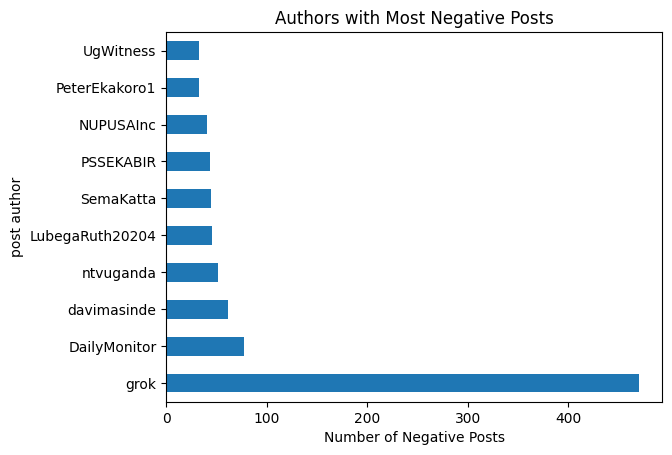

In [ ]:
top_negative['Negative'].plot(kind='barh')
plt.title('Authors with Most Negative Posts')
plt.xlabel('Number of Negative Posts')
plt.show()


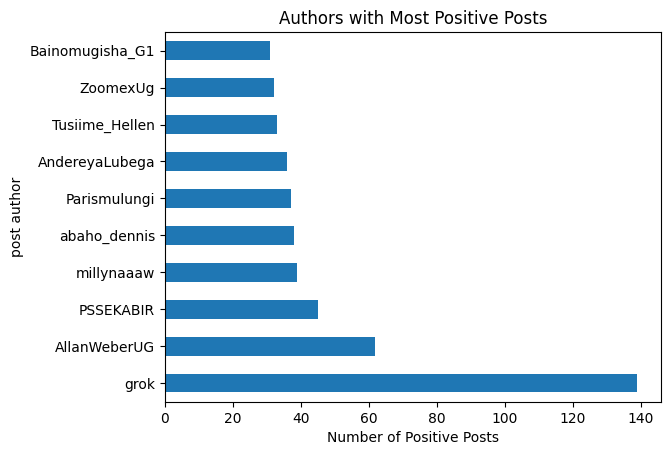

In [ ]:
top_positive = (
    author_sent
    .drop(index='SafeBoda', errors='ignore')
    .sort_values('Positive', ascending=False)
    .head(10)
)

top_positive['Positive'].plot(kind='barh')
plt.title('Authors with Most Positive Posts')
plt.xlabel('Number of Positive Posts')
plt.show()


## Key topics

In [ ]:
def extract_hashtags(text):
    if pd.isna(text):
        return []
    return re.findall(r'#\w+', text.lower())

posts_df['hashtags'] = posts_df['text'].apply(extract_hashtags)

In [ ]:
def get_bigrams(corpus):
    vec = CountVectorizer(
        ngram_range=(2,2),
        stop_words='english',
        min_df=5  # IMPORTANT: remove noise
    )
    X = vec.fit_transform(corpus)
    return pd.Series(
        X.sum(axis=0).A1,
        index=vec.get_feature_names_out()
    ).sort_values(ascending=False)


In [ ]:
def hashtag_distribution(df, sentiment, top_n=15):
    return (
        df[df['sentiment'] == sentiment]
        .explode('hashtags')
        .dropna(subset=['hashtags'])
        ['hashtags']
        .value_counts()
        .head(top_n)
    )


In [ ]:
pos_hashtags = hashtag_distribution(posts_df, 'Positive')
neg_hashtags = hashtag_distribution(posts_df, 'Negative')


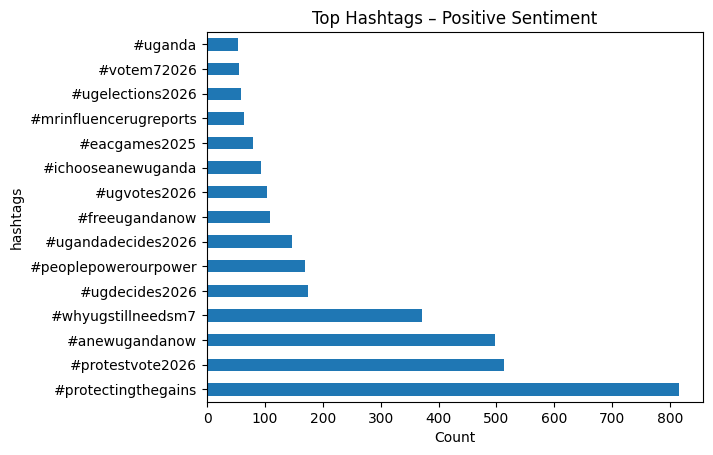

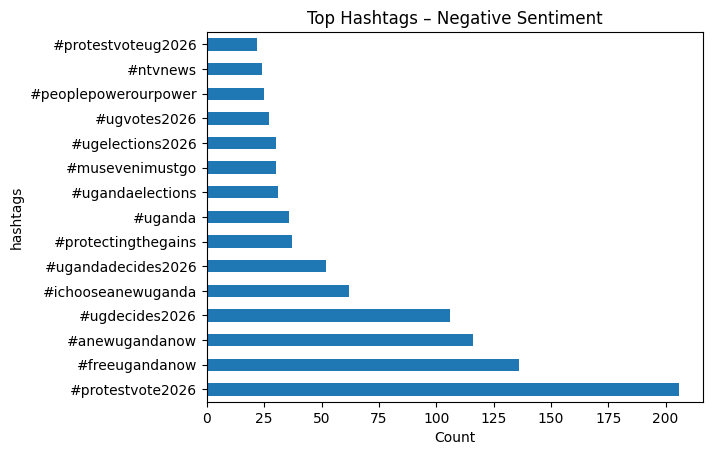

In [ ]:
pos_hashtags.plot(kind='barh')
plt.title('Top Hashtags – Positive Sentiment')
plt.xlabel('Count')
plt.show()

neg_hashtags.plot(kind='barh')
plt.title('Top Hashtags – Negative Sentiment')
plt.xlabel('Count')
plt.show()


In [ ]:
pos_bigrams = get_bigrams(
    df[df['sentiment'] == 'Positive']['text']
)

neg_bigrams = get_bigrams(
    df[df['sentiment'] == 'Negative']['text']
)


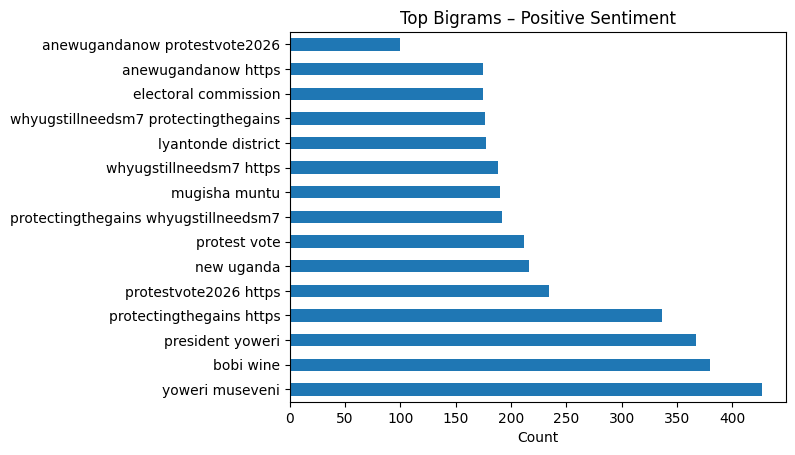

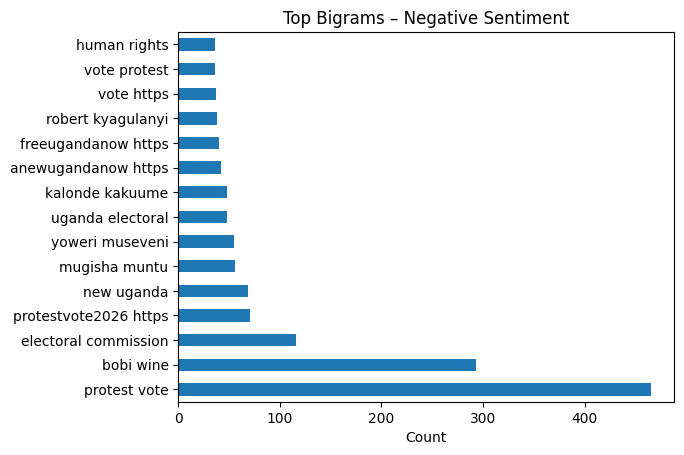

In [ ]:
pos_bigrams.head(15).plot(kind='barh')
plt.title('Top Bigrams – Positive Sentiment')
plt.xlabel('Count')
plt.show()

neg_bigrams.head(15).plot(kind='barh')
plt.title('Top Bigrams – Negative Sentiment')
plt.xlabel('Count')
plt.show()


## MK analysis

In [ ]:
mk_mentions_posts = posts_df[posts_df['text'].str.contains('mkainerugaba|muhoozi', case=False, na=False)]
mk_mentions_posts = mk_mentions_posts.drop_duplicates(subset=['twitterUrl'])

print(f"Number of posts mentioning mkainerugaba or muhoozi: {mk_mentions_posts.shape[0]}")
mk_mentions_posts.head()

Number of posts mentioning mkainerugaba or muhoozi: 2764


,type,id,url,twitterUrl,text,fullText,source,retweetCount,replyCount_x,likeCount,...,post author,total_engagement,source_clean,comment_author_handle,post_date,comment_date,post_type_label,mentions_ai,ai_type,week
11,tweet,2000427265771938048,https://x.com/ClaireNamara12/status/2000427265...,https://twitter.com/ClaireNamara12/status/2000...,"This morning, we are appearing before Mag. Con...","This morning, we are appearing before Mag. Con...",Twitter for Android,19,2,37,...,ClaireNamara12,59,Twitter for Android,None,2025-12-15 04:46:40+00:00,2025-12-16 05:56:58,Original Post,False,No Mention,2025-12-15
657,tweet,2001373822377946880,https://x.com/anti_seven2/status/2001373822377...,https://twitter.com/anti_seven2/status/2001373...,"These alive events happening now , being done...","These alive events happening now , being done...",Twitter for Android,0,0,0,...,anti_seven2,0,Twitter for Android,None,2025-12-17 19:27:57+00:00,NaT,Original Post,False,No Mention,2025-12-15
686,tweet,2001230596777852928,https://x.com/nyerger/status/2001230596777853121,https://twitter.com/nyerger/status/20012305967...,@Mkainerugaba_ #ANewUgandaNow,@Mkainerugaba_ #ANewUgandaNow,Twitter for Android,0,0,0,...,nyerger,0,Twitter for Android,None,2025-12-17 09:58:49+00:00,NaT,Original Post,False,No Mention,2025-12-15
693,tweet,2001185709344826112,https://x.com/omwavuatteguya/status/2001185709...,https://twitter.com/omwavuatteguya/status/2001...,@MwesigyeFranks @jbyabs @UgandaPrisons @mkaine...,@MwesigyeFranks @jbyabs @UgandaPrisons @mkaine...,Twitter for Android,0,2,7,...,omwavuatteguya,9,Twitter for Android,None,2025-12-17 07:00:27+00:00,2025-12-18 09:46:47,Original Post,False,No Mention,2025-12-15
704,tweet,2000833345325003008,https://x.com/da5_david/status/200083334532500...,https://twitter.com/da5_david/status/200083334...,@MwesigyeFranks @mkainerugaba @Mkainerugaba_ @...,@MwesigyeFranks @mkainerugaba @Mkainerugaba_ @...,Twitter for Android,1,0,4,...,da5_david,5,Twitter for Android,None,2025-12-16 07:40:17+00:00,NaT,Original Post,False,No Mention,2025-12-15


In [ ]:
mk_posts = posts_df[posts_df["post author"] == "mkainerugaba"].copy()

mk_posts.shape

(2, 69)

In [ ]:
mk_posts.head()

,type,id,url,twitterUrl,text,fullText,source,retweetCount,replyCount_x,likeCount,...,post author,total_engagement,source_clean,comment_author_handle,post_date,comment_date,post_type_label,mentions_ai,ai_type,week
39202,tweet,2012642398711513088,https://x.com/mkainerugaba/status/201264239871...,https://twitter.com/mkainerugaba/status/201264...,Anyway forget Kabobi. Those who want Kasente r...,Anyway forget Kabobi. Those who want Kasente r...,Twitter for Android,2341,1191,4554,...,mkainerugaba,8209,Twitter for Android,None,2026-01-17 21:45:15+00:00,NaT,Original Post,False,No Mention,2026-01-12
39216,tweet,2012616122793701888,https://x.com/mkainerugaba/status/201261612279...,https://twitter.com/mkainerugaba/status/201261...,Is the safe place your latrine Kabobi? Cause n...,Is the safe place your latrine Kabobi? Cause n...,Twitter for Android,278,518,2093,...,mkainerugaba,2928,Twitter for Android,None,2026-01-17 20:00:50+00:00,NaT,Quote Tweet,False,No Mention,2026-01-12


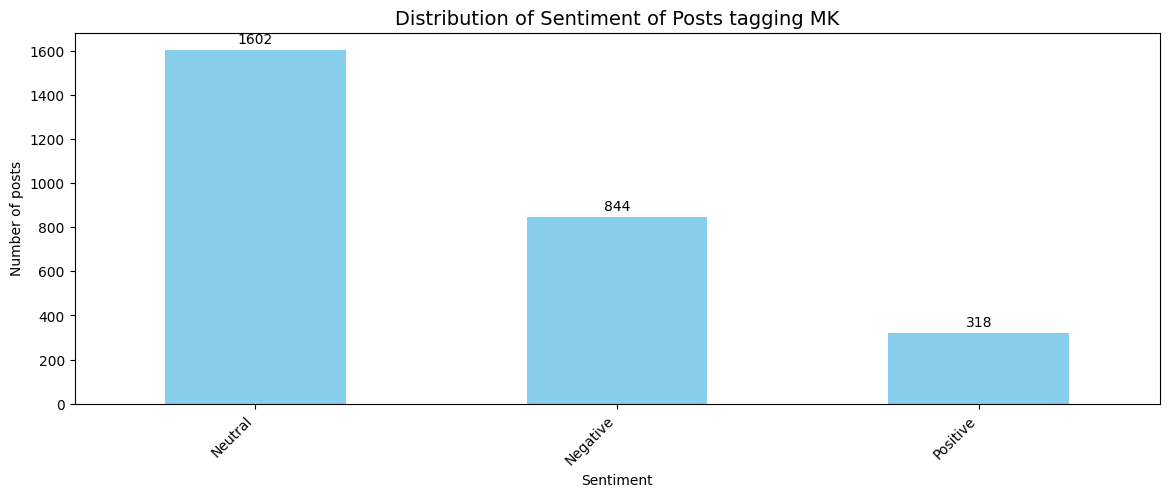

In [ ]:

# 1. Get the distribution
manip_dist = mk_mentions_posts["post sentiment"].value_counts()

# 2. Create a larger figure FIRST
plt.figure(figsize=(14, 7))  # wider figure for long labels

# 3. Create the bar plot
ax = manip_dist.plot(kind="bar", color="skyblue")

# 4. Add counts on top of bars
ax.bar_label(ax.containers[0], padding=3)

# 5. Styling and labels
plt.title("Distribution of Sentiment of Posts tagging MK", fontsize=14)
plt.ylabel("Number of posts")
plt.xlabel("Sentiment")

# 6. Rotate labels and align
plt.xticks(rotation=45, ha="right")

# 7. Extra margin at bottom for long labels
plt.subplots_adjust(bottom=0.35)

plt.show()


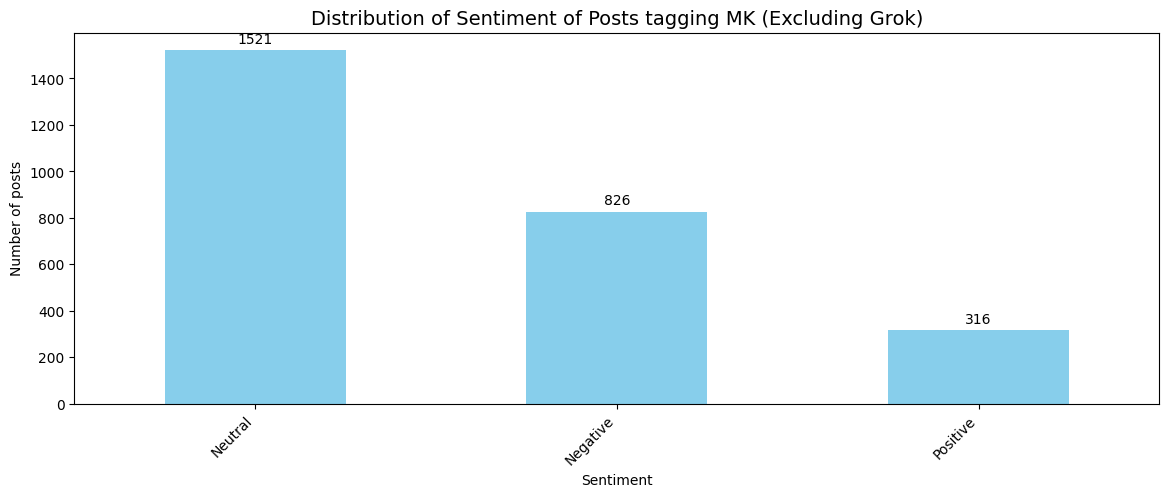

In [ ]:
# 1. Get the distribution, excluding posts from 'grok'
manip_dist = mk_mentions_posts[mk_mentions_posts['post author'] != 'grok']["post sentiment"].value_counts()

# 2. Create a larger figure FIRST
plt.figure(figsize=(14, 7))  # wider figure for long labels

# 3. Create the bar plot
ax = manip_dist.plot(kind="bar", color="skyblue")

# 4. Add counts on top of bars
ax.bar_label(ax.containers[0], padding=3)

# 5. Styling and labels
plt.title("Distribution of Sentiment of Posts tagging MK (Excluding Grok)", fontsize=14)
plt.ylabel("Number of posts")
plt.xlabel("Sentiment")

# 6. Rotate labels and align
plt.xticks(rotation=45, ha="right")

# 7. Extra margin at bottom for long labels
plt.subplots_adjust(bottom=0.35)

plt.show()

In [ ]:
mk_mentions_posts[['text', 'sentiment', 'post author', 'emotion reply']].iloc[240].values

array(['@FredShaka @mkainerugaba @SSssebunya @Nats20122351 @BalaamBarugahar @MKatungi @Sammy_UG01 @JonahRuhima No more fear ... protest vote.....',
       'Negative', 'ManyuraMboga', 'neutral'], dtype=object)

/tmp/ipython-input-3477507102.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3477507102.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3477507102.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


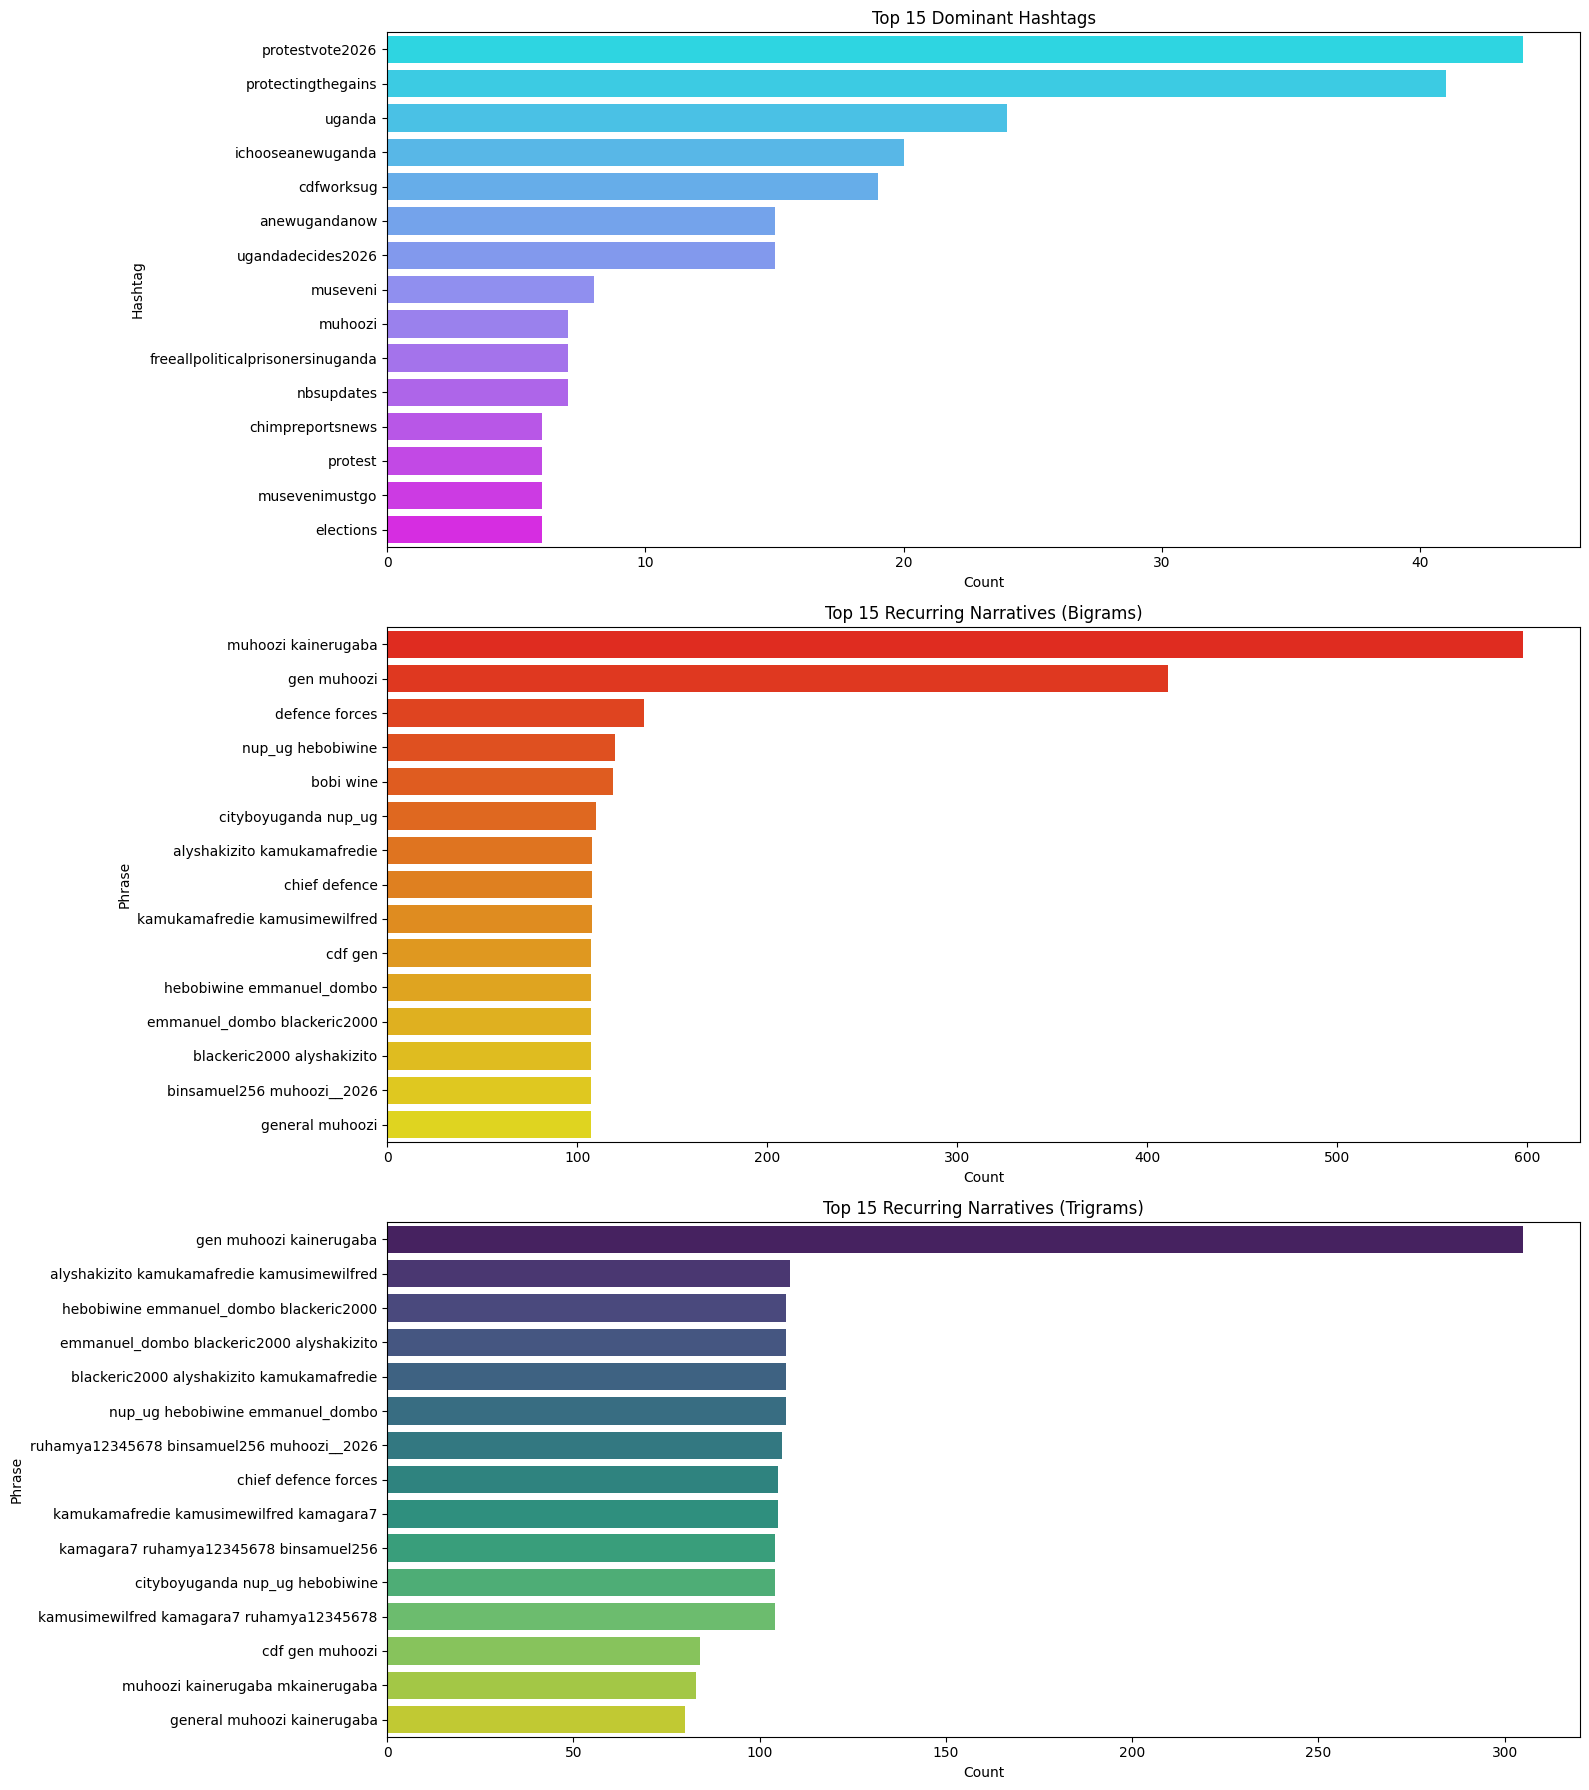

In [ ]:
plot_hashtags_bigrams_trigrams(mk_mentions_posts, 'text')

post author
grok               101
LubegaRuth20204     34
Plumedia1           22
kakensaug           22
kamukamafredie      16
SabilaWabobi        13
umars1494           11
SSssebunya          10
Fahad38158546       10
NyonyoziUg           9
Name: count, dtype: int64


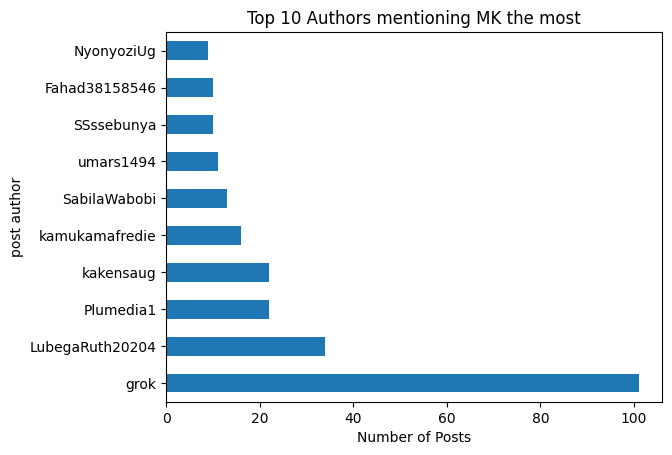

In [ ]:
# Count the number of posts per page/user
top_posters = mk_mentions_posts['post author'].value_counts().head(10)

print(top_posters)

# Visualization
top_posters.plot(kind='barh', title='Top 10 Authors mentioning MK the most')
plt.xlabel('Number of Posts')
plt.show()

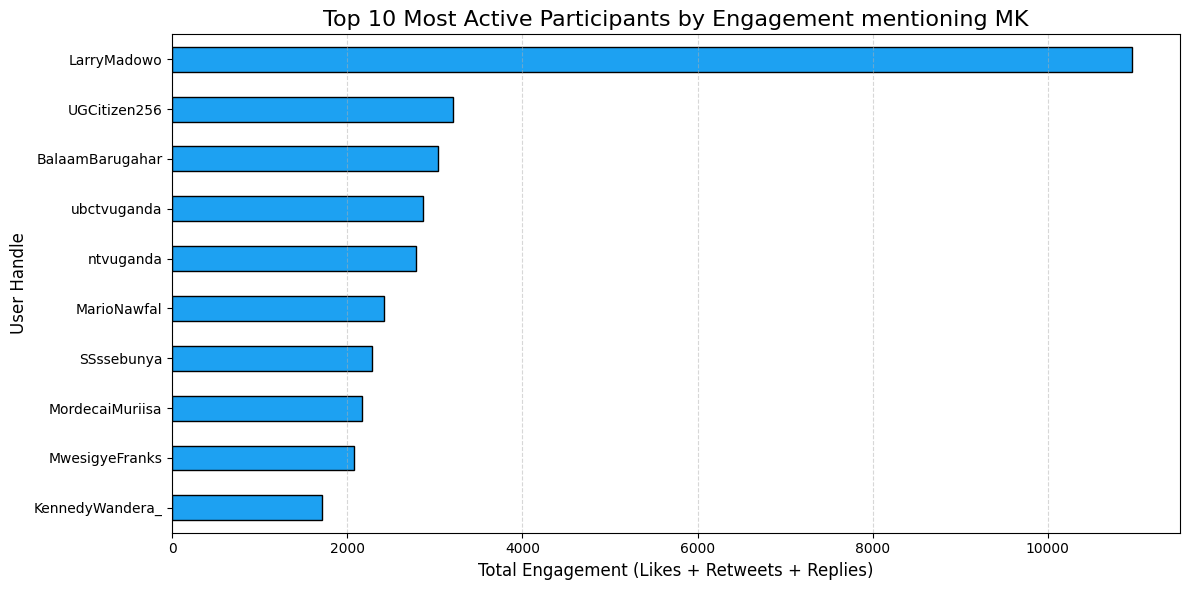

In [ ]:
metrics = ['retweetCount', 'replyCount_x', 'likeCount', 'quoteCount_x']

mk_mentions_posts[metrics] = mk_mentions_posts[metrics].apply(pd.to_numeric, errors='coerce').fillna(0)

mk_mentions_posts['total_engagement'] = mk_mentions_posts[metrics].sum(axis=1)

top_engaged = mk_mentions_posts.groupby('post author')['total_engagement'].sum()

top_10_engaged = top_engaged.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))

top_10_engaged.sort_values(ascending=True).plot(
    kind='barh',
    color='#1DA1F2',
    edgecolor='black'
)

plt.title('Top 10 Most Active Participants by Engagement mentioning MK', fontsize=16)
plt.xlabel('Total Engagement (Likes + Retweets + Replies)', fontsize=12)
plt.ylabel('User Handle', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()

### MK emotions analysis

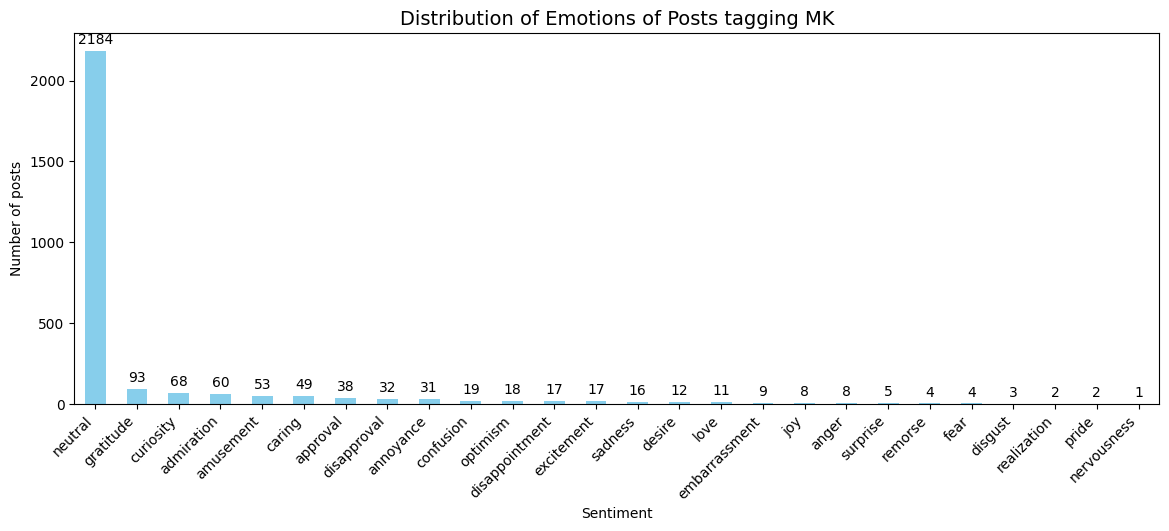

In [ ]:

# 1. Get the distribution
manip_dist = mk_mentions_posts["emotion reply"].value_counts()

# 2. Create a larger figure FIRST
plt.figure(figsize=(14, 7))  # wider figure for long labels

# 3. Create the bar plot
ax = manip_dist.plot(kind="bar", color="skyblue")

# 4. Add counts on top of bars
ax.bar_label(ax.containers[0], padding=3)

# 5. Styling and labels
plt.title("Distribution of Emotions of Posts tagging MK", fontsize=14)
plt.ylabel("Number of posts")
plt.xlabel("Sentiment")

# 6. Rotate labels and align
plt.xticks(rotation=45, ha="right")

# 7. Extra margin at bottom for long labels
plt.subplots_adjust(bottom=0.35)

plt.show()
